# Telecom Churn - Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.
<br>
<br>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Business Objective

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Dataset

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

In this project, you will use the usage-based definition to define churn.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Find the percentage of missing values in dataframe
missing_df = pd.DataFrame({
    "Columns": df.columns[df.isnull().sum()>0],
    "Values": df[df.columns[df.isnull().sum()>0]].isnull().sum()/len(df)*100
})
missing_df = missing_df.reset_index(drop=True)

In [6]:
missing_df[missing_df["Values"]>10]

,Columns,Values
126,date_of_last_rech_data_6,74.846748
127,date_of_last_rech_data_7,74.428744
128,date_of_last_rech_data_8,73.660737
129,date_of_last_rech_data_9,74.077741
130,total_rech_data_6,74.846748
131,total_rech_data_7,74.428744
132,total_rech_data_8,73.660737
133,total_rech_data_9,74.077741
134,max_rech_data_6,74.846748
135,max_rech_data_7,74.428744


In [7]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)    

# Data Preprocessing

### 1. Derive new features

We will fill null values with 0 as it means that no recharge is done by the customer.

In [8]:
# Fill null value of total number of recharge data by zero
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0.0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0.0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0.0)

# Fill null value of average recharge amount data by zero
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0.0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0.0)

# Fill null values of max_recharge_amount data by zero
df['max_rech_data_6'] = df['max_rech_data_6'].fillna(0.0)
df['max_rech_data_7'] = df['max_rech_data_7'].fillna(0.0)
df['max_rech_data_8'] = df['max_rech_data_8'].fillna(0.0)


# Fill null values of count recharge 3g data by zero
df['count_rech_3g_6'] = df['count_rech_3g_6'].fillna(0.0)
df['count_rech_3g_7'] = df['count_rech_3g_7'].fillna(0.0)
df['count_rech_3g_8'] = df['count_rech_3g_8'].fillna(0.0)

We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

In [9]:
# Create new column total recharge amount : total_rech_amt_data for calculating High Value customer process
df['total_rech_data_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_data_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_data_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']

# Total recharge amount data
df['total_recharge_amt_call_data_6'] = (df['av_rech_amt_data_6'] * df['total_rech_data_6']) + df['total_rech_amt_6']
df['total_recharge_amt_call_data_7'] = (df['av_rech_amt_data_7'] * df['total_rech_data_7']) + df['total_rech_amt_7']
df['total_recharge_amt_call_data_8'] = (df['av_rech_amt_data_8'] * df['total_rech_data_8']) + df['total_rech_amt_8']

### 2. Filter High-Value Customers (HVC)

In [10]:
# Calculate the total average recharge amount for june and july i.e. for months 6 and 7 (the good phase)
df['total_avg_rech_amnt_67'] = (df['total_recharge_amt_call_data_6'] + df['total_recharge_amt_call_data_7'])/2

In [11]:
# Look at 70 percentile of the calculated average amount
percentile_70_6_7 = np.percentile(df['total_avg_rech_amnt_67'], 70.0)
print("70 percentile is : ", percentile_70_6_7)

70 percentile is :  478.0


In [12]:
# Retain only those customers who have recharged more than or equal to 70 percentile of recharge amount
df_hvc = df[df['total_avg_rech_amnt_67'] >= percentile_70_6_7].reset_index(drop=True)
print("Shape: ", df_hvc.shape)

Shape:  (30001, 233)


In [13]:
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_recharge_amt_call_data_6,total_recharge_amt_call_data_7,total_recharge_amt_call_data_8,total_avg_rech_amnt_67
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN

### 3. Tag churners and remove attributes of the churn phase


Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [14]:
df_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [15]:
# Create column "churn" whose values would be either 1 (churn) or 0 (non-churn)
df_hvc['churn'] = np.where(df_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1, 0)
df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_recharge_amt_call_data_6,total_recharge_amt_call_data_7,total_recharge_amt_call_data_8,total_avg_rech_amnt_67,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,N

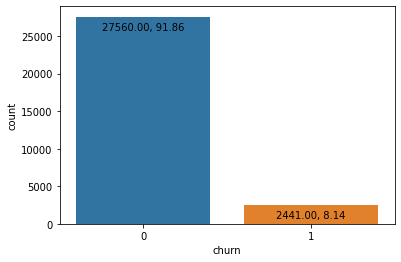

In [16]:
ax = sns.countplot(x = df_hvc['churn'])
label_values(ax, spacing=-15)
plt.show()

In [17]:
# In the dataframe column list we can see we have 4 columns whose name is wrongly written,
# aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, sep_vbc_3g
# Rename these columns

df_hvc = df_hvc.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'})

After tagging churners, **remove all the attributes corresponding to the churn phase** (all attributes having ‘ _9’, etc. in their names).

In [18]:
churn_phase_columns =  df_hvc.columns[df_hvc.columns.str.contains('_9')]
len(churn_phase_columns)

55

In [19]:
df_hvc = df_hvc.drop(churn_phase_columns, axis = 1)

In [20]:
df_hvc.shape

(30001, 179)

# Exploratory Data Analysis

### No variance columns

In [21]:
# Find variables with no variance i.e. only one value in the variable

variance_df_hvc = pd.DataFrame({
    "Columns": df_hvc.columns[df_hvc.nunique()==1],
    "Missing Percentage": df_hvc[df_hvc.columns[df_hvc.nunique()==1]].isnull().sum()/len(df_hvc)*100,
    "Values": df_hvc[df_hvc.columns[df_hvc.nunique()==1]].nunique()
})
variance_df_hvc = variance_df_hvc.reset_index(drop=True)
variance_df_hvc

,Columns,Missing Percentage,Values
0,circle_id,0.000000,1
1,loc_og_t2o_mou,0.746642,1
2,std_og_t2o_mou,0.746642,1
3,loc_ic_t2o_mou,0.746642,1
4,last_date_of_month_6,0.000000,1
5,last_date_of_month_7,0.089997,1
6,last_date_of_month_8,0.549982,1
7,std_og_t2c_mou_6,1.816606,1
8,std_og_t2c_mou_7,1.789940,1
9,std_og_t2c_mou_8,3.913203,1


In [22]:
# These columns have no variance and number of missing values are also less
df_hvc = df_hvc.drop(list(variance_df_hvc["Columns"]), axis = 1)
df_hvc.shape

(30001, 166)

In [23]:
df_hvc.dtypes

mobile_number                       int64
arpu_6                            float64
arpu_7                            float64
arpu_8                            float64
onnet_mou_6                       float64
onnet_mou_7                       float64
onnet_mou_8                       float64
offnet_mou_6                      float64
offnet_mou_7                      float64
offnet_mou_8                      float64
roam_ic_mou_6                     float64
roam_ic_mou_7                     float64
roam_ic_mou_8                     float64
roam_og_mou_6                     float64
roam_og_mou_7                     float64
roam_og_mou_8                     float64
loc_og_t2t_mou_6                  float64
loc_og_t2t_mou_7                  float64
loc_og_t2t_mou_8                  float64
loc_og_t2m_mou_6                  float64
loc_og_t2m_mou_7                  float64
loc_og_t2m_mou_8                  float64
loc_og_t2f_mou_6                  float64
loc_og_t2f_mou_7                  

In [24]:
df_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_recharge_amt_call_data_6,total_recharge_amt_call_data_7,total_recharge_amt_call_data_8,total_avg_rech_amnt_67,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,

In [25]:
# Find number of values in remaining columns

unique_df_hvc = pd.DataFrame({
    "Columns": df_hvc.columns,
    "Values": df_hvc.nunique()
})
unique_df_hvc = variance_df_hvc.reset_index(drop=True)
unique_df_hvc

,Columns,Missing Percentage,Values
0,circle_id,0.000000,1
1,loc_og_t2o_mou,0.746642,1
2,std_og_t2o_mou,0.746642,1
3,loc_ic_t2o_mou,0.746642,1
4,last_date_of_month_6,0.000000,1
5,last_date_of_month_7,0.089997,1
6,last_date_of_month_8,0.549982,1
7,std_og_t2c_mou_6,1.816606,1
8,std_og_t2c_mou_7,1.789940,1
9,std_og_t2c_mou_8,3.913203,1


In [26]:
# We can drop mobile number as it is a unique or indentity columns

df_hvc = df_hvc.drop(['mobile_number'], axis = 1)

### Columns with dtypes as int and float

In [27]:
int_float_columns = df_hvc[list(df_hvc.columns[df_hvc.dtypes == int]) + list(df_hvc.columns[df_hvc.dtypes == float])].nunique()
int_float_columns

total_rech_num_6                    102
total_rech_num_7                    101
total_rech_num_8                     96
total_rech_amt_6                   2298
total_rech_amt_7                   2316
total_rech_amt_8                   2305
max_rech_amt_6                      172
max_rech_amt_7                      161
max_rech_amt_8                      182
last_day_rch_amt_6                  157
last_day_rch_amt_7                  152
last_day_rch_amt_8                  181
monthly_2g_6                          5
monthly_2g_7                          6
monthly_2g_8                          6
sachet_2g_6                          31
sachet_2g_7                          35
sachet_2g_8                          34
monthly_3g_6                         12
monthly_3g_7                         15
monthly_3g_8                         12
sachet_3g_6                          25
sachet_3g_7                          27
sachet_3g_8                          29
aon                                3294


In [28]:
# Target variable
var_target = ['churn']

# Based on business understanding, we will say columns with less than or equal to 15 unique values has potential to be categorical columns

var_categorical = list(set(list(int_float_columns[int_float_columns<=15].keys())) - set(var_target))

# Other features can be numerical variables

var_numerical = list(set(list(int_float_columns.keys())) - set(list(var_categorical))) 


In [29]:
len(list(var_numerical + var_categorical + var_target))

160

In [30]:
# Countplot for each categorical variable
# https://matplotlib.org/2.0.2/examples/statistics/countplot_demo.html

def plot_countplots(col_prefix):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    ax = sns.countplot(y=df_hvc[col_prefix+"_6"], hue=df_hvc["churn"])
    label_values(ax)
    plt.subplot(2,3,2)
    ax = sns.countplot(y=df_hvc[col_prefix+"_7"], hue=df_hvc["churn"])
    label_values(ax)
    plt.subplot(2,3,3)
    ax = sns.countplot(y=df_hvc[col_prefix+"_8"], hue=df_hvc["churn"])
    label_values(ax)
    plt.show()

In [31]:
# Identify month dependent and independent columns
def month_dependent_col_identify(x):
    if ('_6' in x) or ('_7' in x) or ('_8' in x):
        return x

month_dependent_columns = list(map(month_dependent_col_identify, var_numerical))
month_dependent_columns = list(filter(None, month_dependent_columns))

month_independent_columns = list(set(var_numerical) - set(month_dependent_columns))

In [32]:
month_independent_columns

['churn', 'aon']

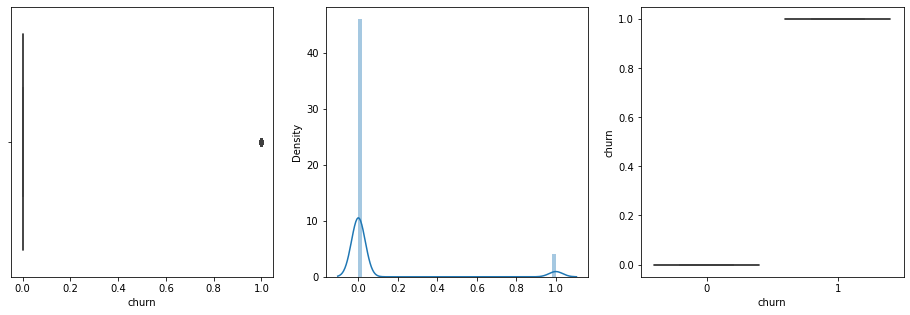

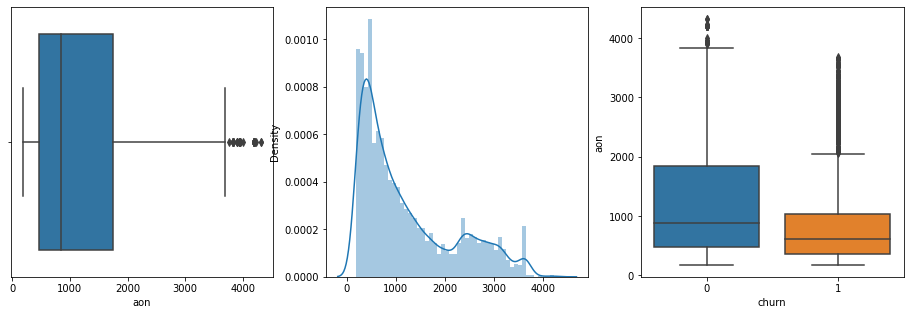

In [33]:
# Plot for variables which are not dependent on months

for column in month_independent_columns:
    plt.subplots(figsize=(16, len(var_numerical)*6))
    plt.subplot(len(var_numerical) + 1, 3, 1)
    sns.boxplot(x = df_hvc[column])
    plt.subplot(len(var_numerical) + 1, 3, 2)
    sns.distplot(x = df_hvc[column])
    plt.subplot(len(var_numerical) + 1, 3, 3)
    sns.boxplot(x = df_hvc["churn"], y = df_hvc[column])
    plt.show()

**AOU (Age on network - number of days the customer is using the operator T network):** <br>
We can most people who churn has smaller age as compared to non-churn customers.

In [34]:
# Countplot for each categorical variable
# https://matplotlib.org/2.0.2/examples/statistics/countplot_demo.html

def plot_countplots(col_prefix):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    ax = sns.countplot(x=df_hvc[col_prefix+"_6"], hue=df_hvc["churn"])
    label_values(ax)
    plt.subplot(2,3,2)
    ax = sns.countplot(x=df_hvc[col_prefix+"_7"], hue=df_hvc["churn"])
    label_values(ax)
    plt.subplot(2,3,3)
    ax = sns.countplot(x=df_hvc[col_prefix+"_8"], hue=df_hvc["churn"])
    label_values(ax)
    plt.show()

In [35]:
# Box plot for  6th, 7th and 8th month
# https://matplotlib.org/2.0.2/examples/statistics/boxplot_demo.html
# showfliers = False to remove the representation of outliers & showmeans to represent means in boxplot

def plot_boxplots(col_prefix):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(y=df_hvc[col_prefix+"_6"],x=df_hvc["churn"],showfliers=False, showmeans=True)
    plt.subplot(2,3,2)
    sns.boxplot(y=df_hvc[col_prefix+"_7"],x=df_hvc["churn"],showfliers=False, showmeans=True)
    plt.subplot(2,3,3)
    sns.boxplot(y=df_hvc[col_prefix+"_8"],x=df_hvc["churn"],showfliers=False, showmeans=True)
    plt.show()

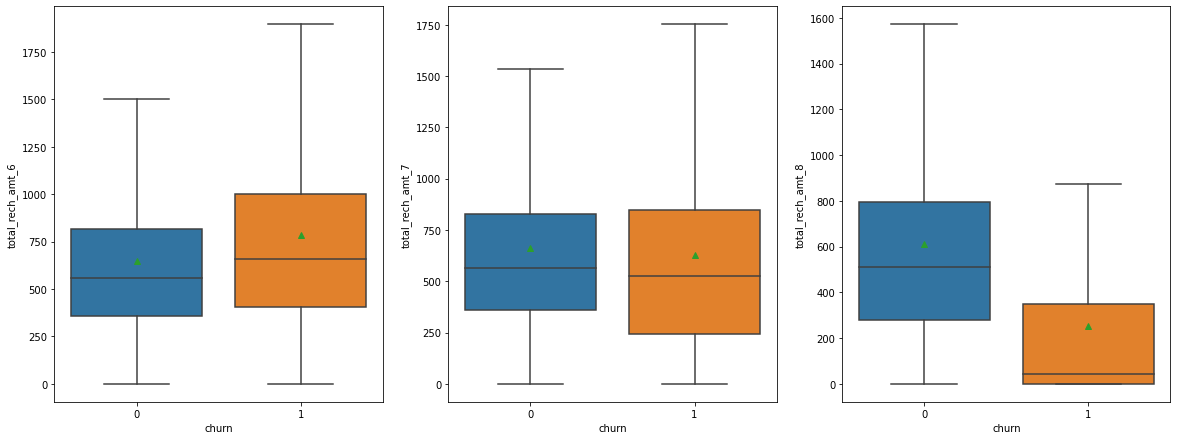

In [36]:
# Total recharge Amount
plot_boxplots('total_rech_amt')

Total recharge amount significantly decrease for the churn customer in 8th month.

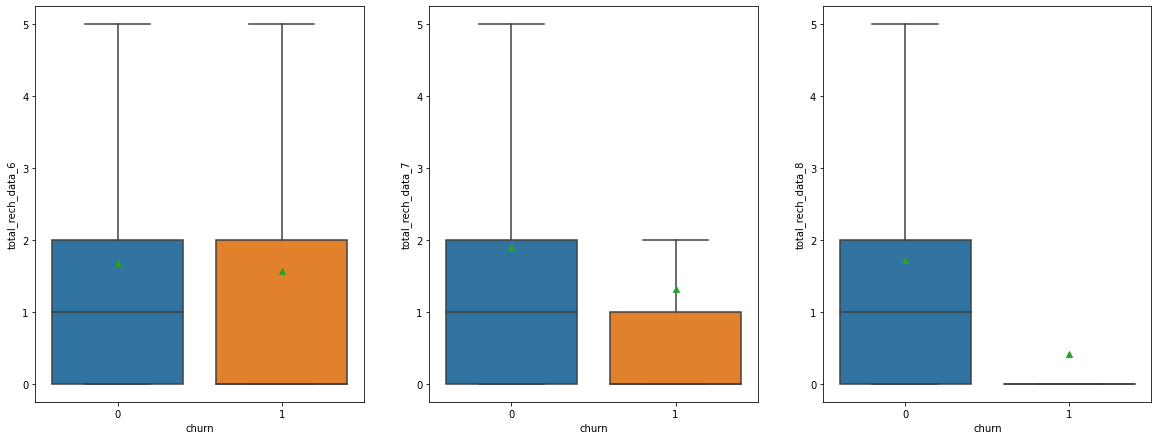

In [37]:
# Ploting for total recharge amount for data:
plot_boxplots('total_rech_data')

Total recharge amount data significantly decrease for the churn customer in 8th month. So data recharge amount is important features based on the boxplots above.

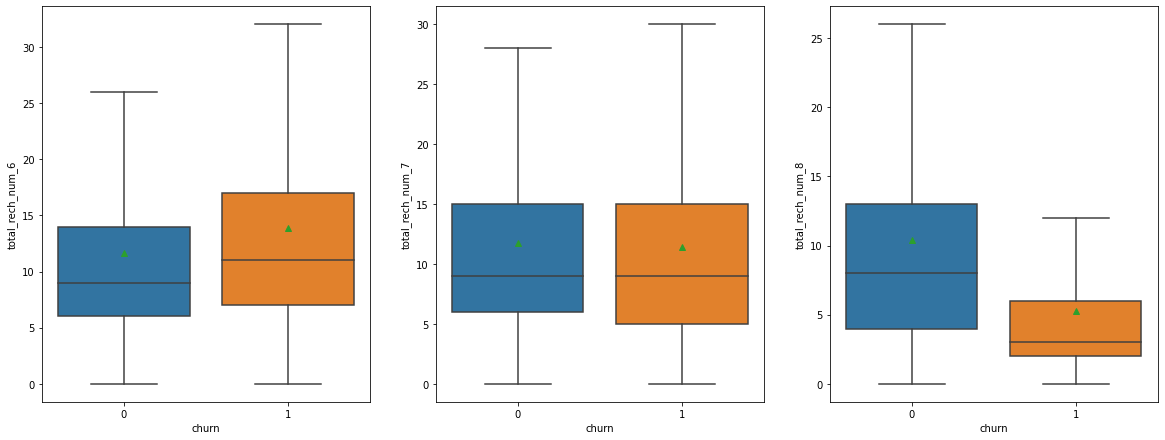

In [38]:
# Ploting for number of times recharge:
plot_boxplots('total_rech_num')

Number of times recharge significantly decrease for the churn customer in 8th month.

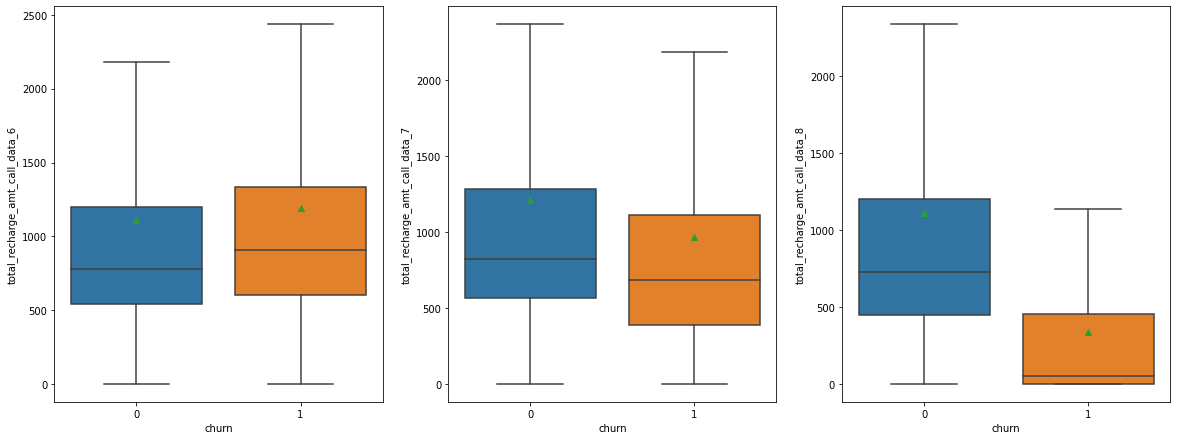

In [39]:
# Ploting for total recharge amount for data and calls:
plot_boxplots('total_recharge_amt_call_data')

Total recharge amount for data and calls significantly decrease for the churn customer in 8th month.

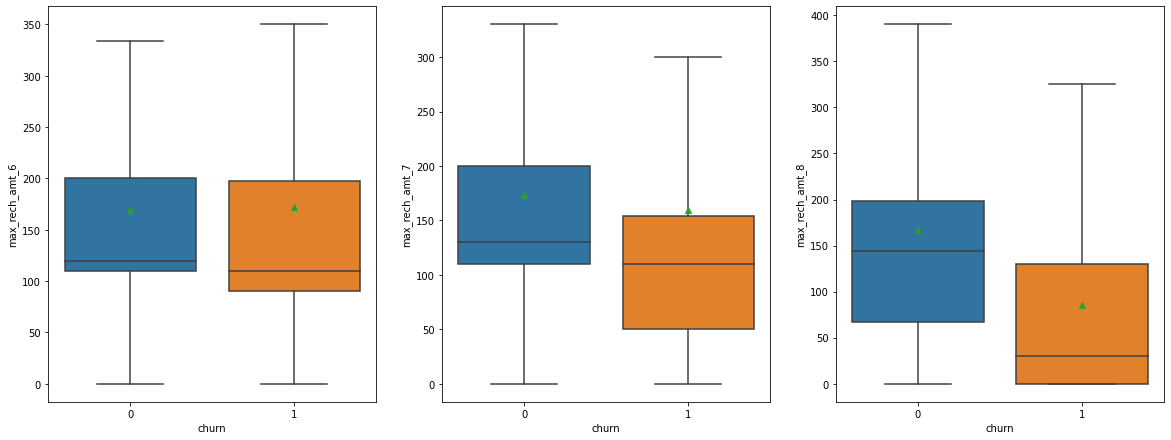

In [40]:
# Maximum recharge amount 
plot_boxplots('max_rech_amt')

Maximum recharge amount for data and calls significantly decrease for the churn customer in successive months.

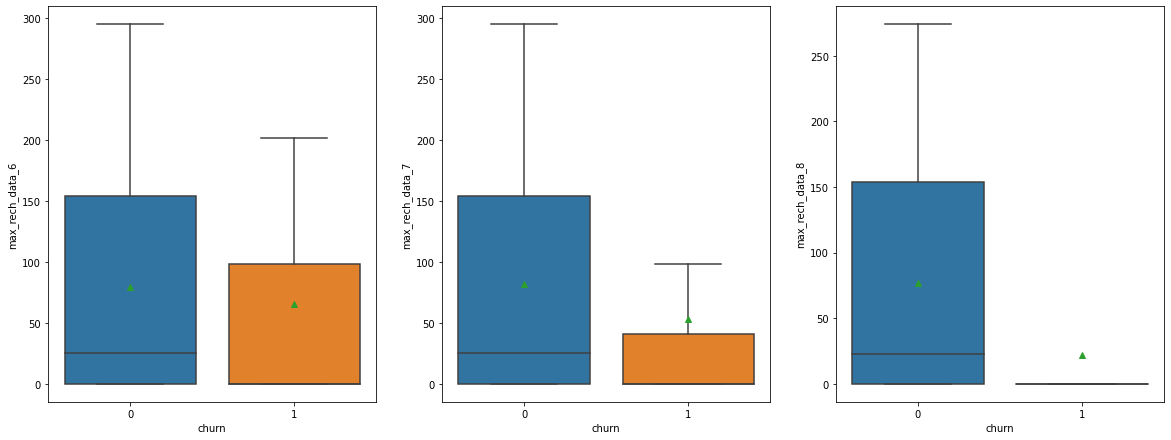

In [41]:
# Maximum recharge data
plot_boxplots('max_rech_data')

In [42]:
rech_columns = list(df_hvc.columns[df_hvc.columns.str.contains('rech')])

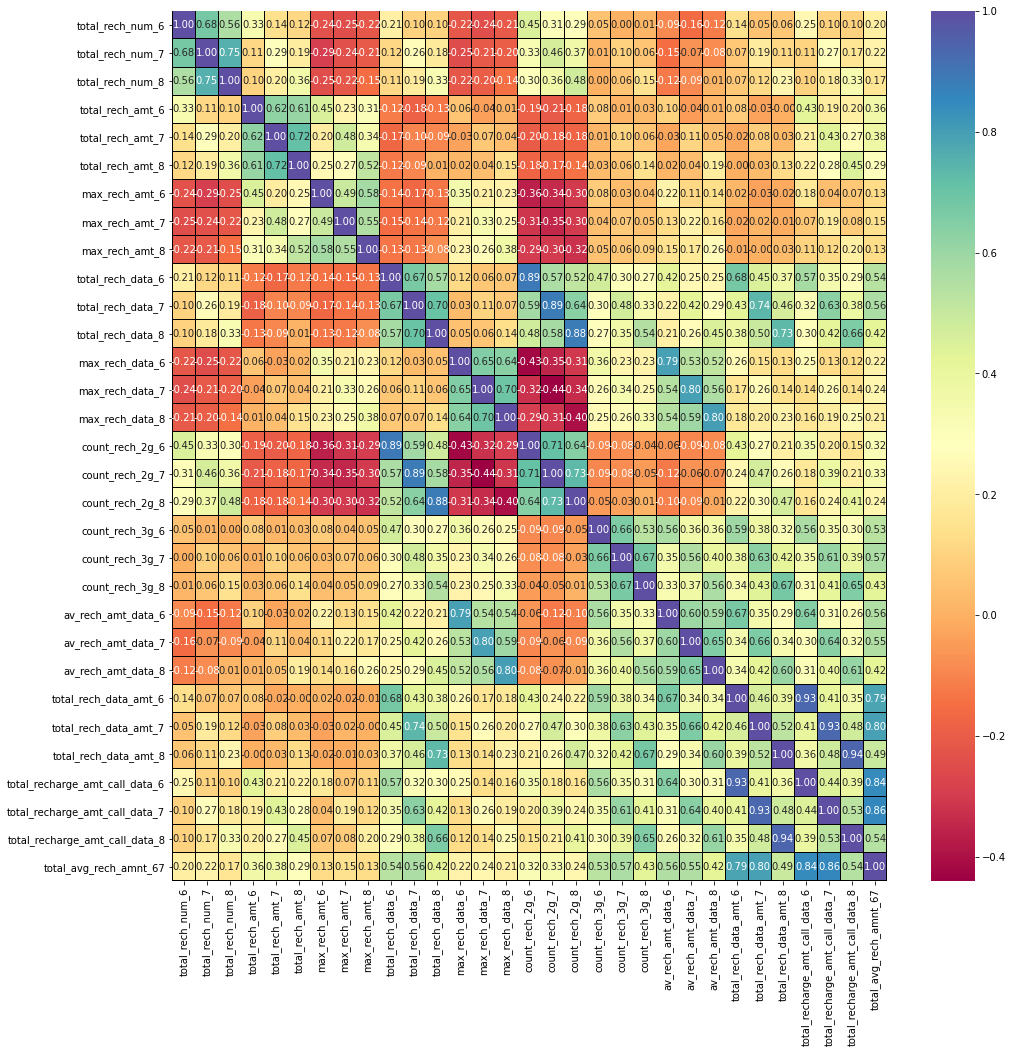

In [43]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_hvc[rech_columns].corr(), 
            annot=True, fmt=".2f", linewidths=0.01, linecolor='black', cmap='Spectral')
plt.show()

By looking at the heatmap we can see high correlation between: <br>
  
    1. count_rech_2g_6 v/s total_rech_data_6 (0.89) <br> 
    2. count_rech_2g_7 v/s total_rech_data_7 (0.89) <br> 
    3. count_rech_2g_8 v/s total_rech_data_8 (0.89) <br> 
    4. total_recharge_amt_call_data_6 v/s total_rech_data_6 (0.93) <br>
    5. total_recharge_amt_call_data_7 v/s total_rech_data_7 (0.93) <br>
    6. total_recharge_amt_call_data_8 v/s total_rech_data_8 (0.94) <br>
    
    
This explains that most data recharge done was for 2g data and most recharges are done by customers were of data.

In [44]:
# So we will drop count_rech_2g columns and total_rech_data columns due to its high correlations
df_hvc = df_hvc.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'], axis = 1)

In [45]:
df_hvc.shape

(30001, 159)

Values are not signicantly changed in max recharge data.

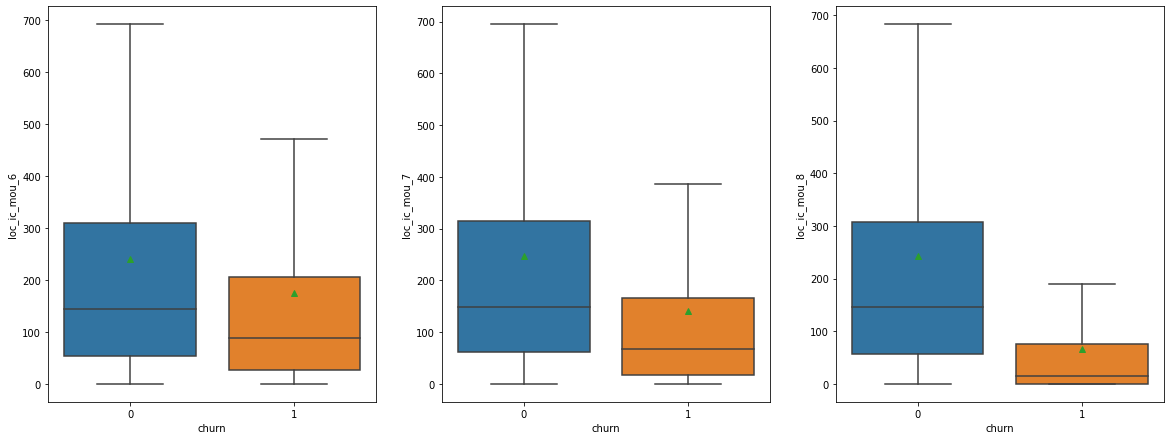

In [46]:
# Local incoming calls minutes usage
plot_boxplots('loc_ic_mou')

Local incoming calls minutes usage significantly decrease for the churn customer in 8th month.

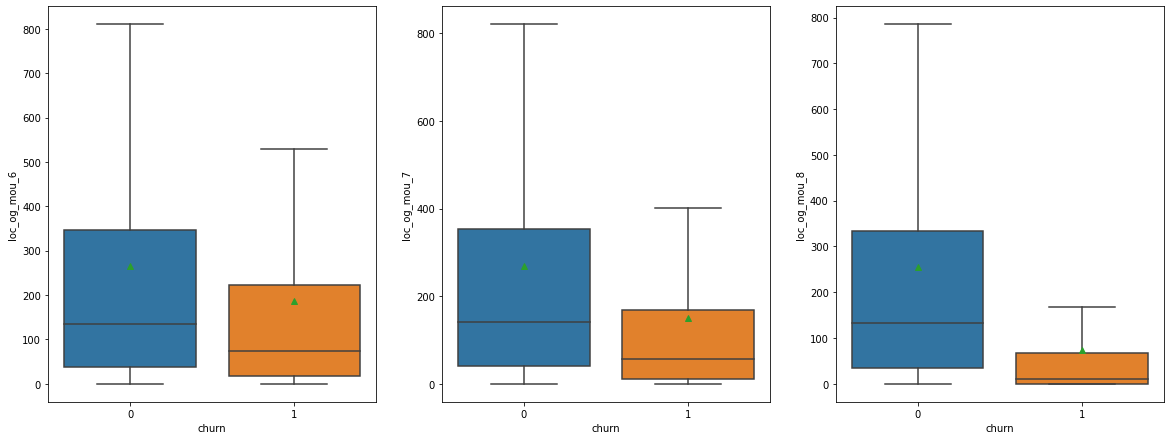

In [47]:
# Local outgoing calls minutes usage
plot_boxplots('loc_og_mou')

Local outgoing calls minutes usage significantly decrease for the churn customer in 8th month. It depreciated more as compared to incoming calls.

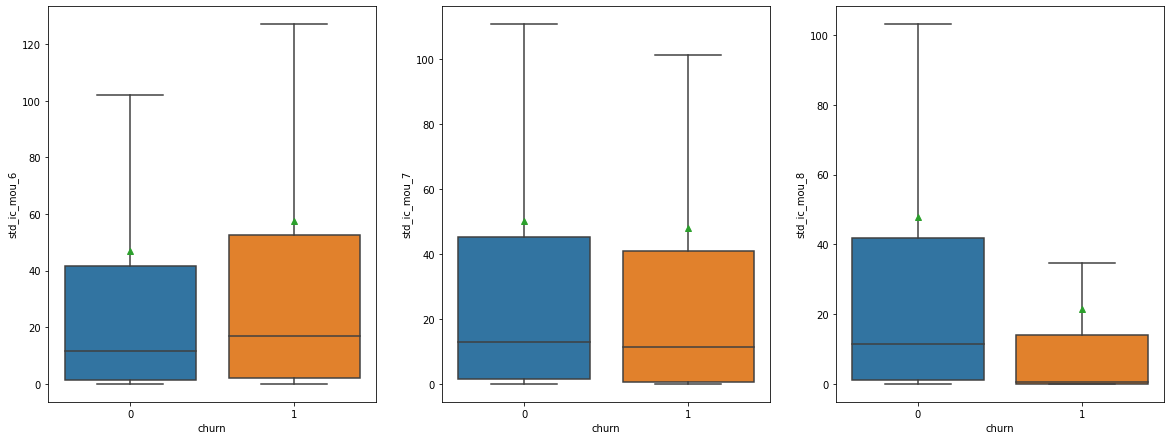

In [48]:
# Outside the calling circles incoming usage

plot_boxplots('std_ic_mou')

STD incoming calls minutes usage significantly decrease for the churn customer in 8th month. It depreciated more as compared to incoming calls.

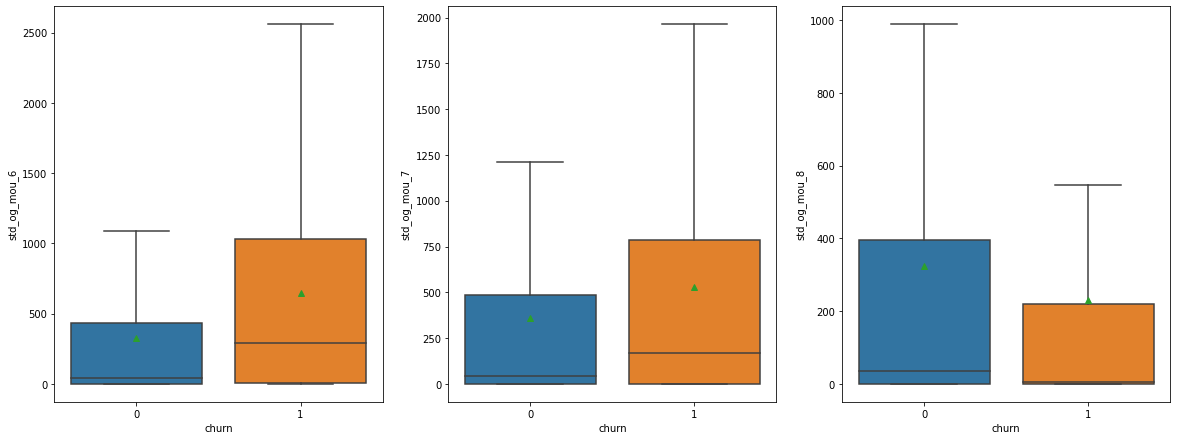

In [49]:
# Outside the calling circles outgoing usage

plot_boxplots('std_og_mou')

STD outgoing calls minutes usage significantly decrease for the churn customer in 8th month. Outgoing calls values are signifcantly higher as coming to incoming when it comes to STD calls.

In [50]:
ic_columns = list(df_hvc.columns[df_hvc.columns.str.contains('.*_ic_.*mou_*')])

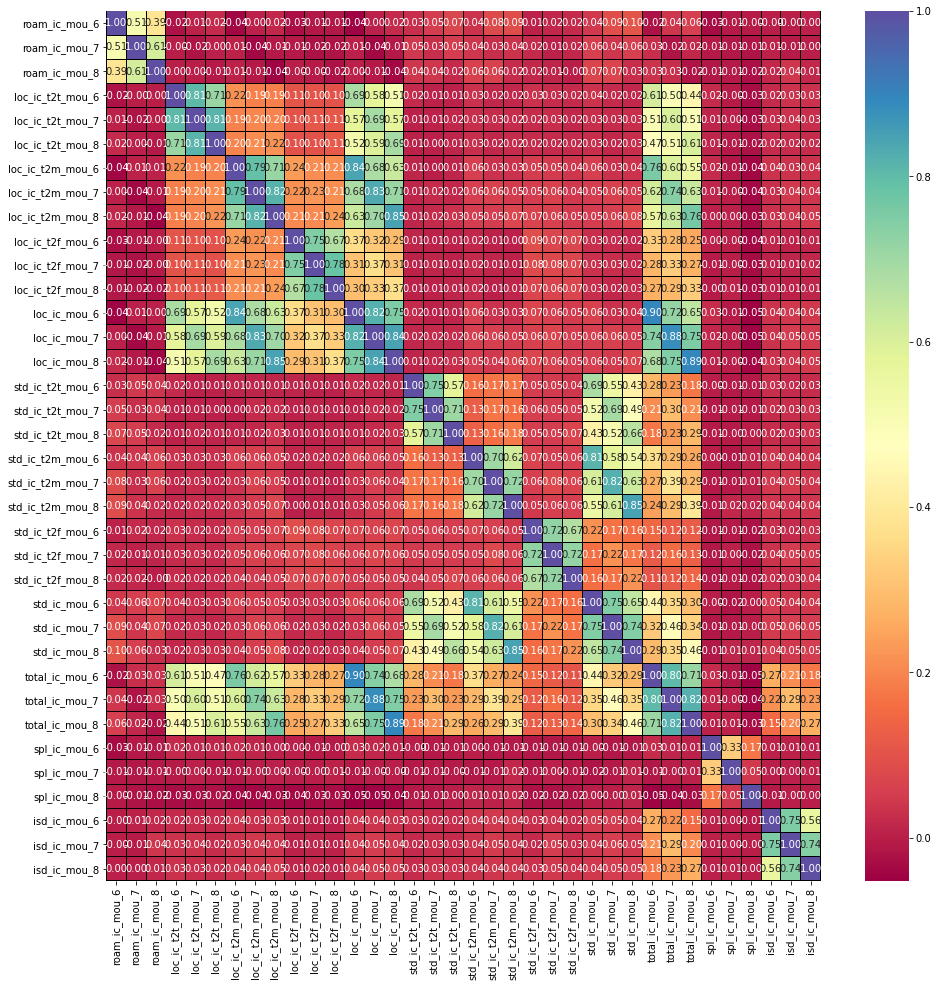

In [51]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_hvc[ic_columns].corr(), 
            annot=True, fmt=".2f", linewidths=0.01, linecolor='black', cmap='Spectral')
plt.show()

By looking at the heatmap we can see high correlation between: <br>
  
    1. total_ic_mou_6 v/s loc_ic_mou_6 (0.90) <br> 
    2. total_ic_mou_7 v/s loc_ic_mou_7 (0.89) <br> 
    3. total_ic_mou_8 v/s loc_ic_mou_8 (0.89) <br> 
    4. std_ic_mou_6 v/s std_ic_t2f_mou_6 (0.81) <br> 
    5. std_ic_mou_7 v/s std_ic_t2f_mou_7 (0.82) <br> 
    6. std_ic_mou_8 v/s std_ic_t2f_mou_8 (0.85) <br>
    
This explains that most data incoming minutes usage was for local calls.

In [52]:
# So we will drop local_ic_mou columns
df_hvc = df_hvc.drop(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8','std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'], axis = 1)

In [53]:
df_hvc.shape

(30001, 153)

In [54]:
og_columns = list(df_hvc.columns[df_hvc.columns.str.contains('.*_og_.*mou_*')])

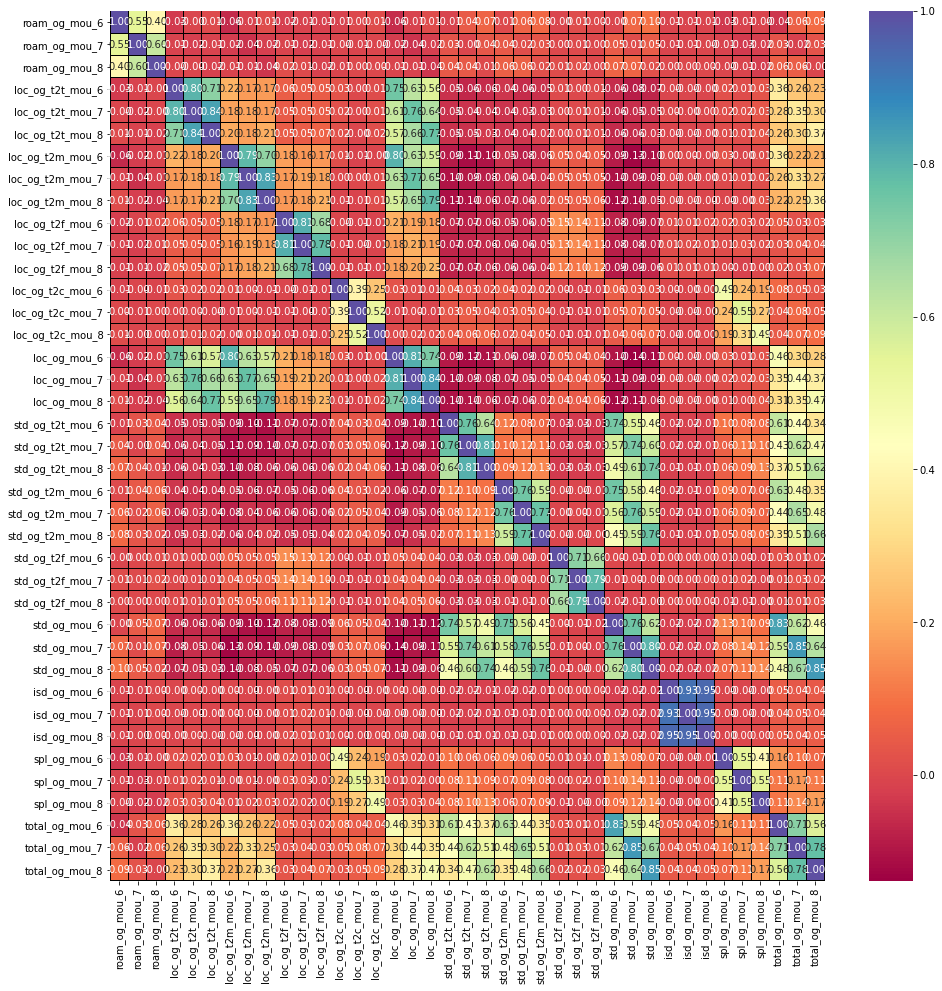

In [55]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_hvc[og_columns].corr(), 
            annot=True, fmt=".2f", linewidths=0.01, linecolor='black', cmap='Spectral')
plt.show()

In [56]:
df_hvc['total_og_mou_6']

0           0.00
1         487.53
2         508.36
3         860.34
4         134.38
          ...   
29996     134.81
29997     464.58
29998    1600.79
29999     375.78
30000       0.00
Name: total_og_mou_6, Length: 30001, dtype: float64

By looking at the heatmap we can see high correlation between: <br>
  
    1. isd_og_mou_7 v/s isd_og_mou_6 (0.93) <br> 
    2. isd_og_mou_8 v/s isd_og_mou_6 (0.95) <br> 
    3. isd_og_mou_8 v/s isd_og_mou_7 (0.95) <br>
    4. total_og_mou_6 v/s std_og_mou_6 (0.83) <br>
    4. total_og_mou_7 v/s std_og_mou_7 (0.85) <br>
    4. total_og_mou_8 v/s std_og_mou_8 (0.85) <br>
    
This explains that isd outgoing calls minutes usage was almost same in all three months and total outgoing revenue is similar to std outgoing minutes usage.

In [57]:
df_hvc[['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']].isnull().sum()*100/len(df_hvc)

isd_og_mou_6    1.816606
isd_og_mou_7    1.789940
isd_og_mou_8    3.913203
std_og_mou_6    1.816606
std_og_mou_7    1.789940
std_og_mou_8    3.913203
dtype: float64

In [58]:
# So we will drop any two of them as they are highly coorelated with each other and has maximum missing values
df_hvc = df_hvc.drop(['isd_og_mou_6', 'isd_og_mou_8'], axis = 1)

In [59]:
df_hvc.shape

(30001, 151)

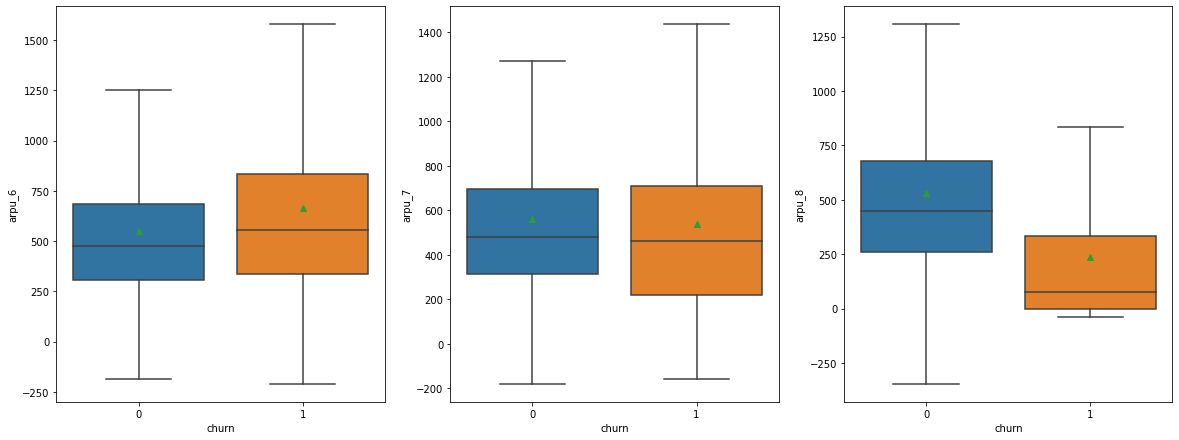

In [60]:
# ARPU (Average revenue per user)
plot_boxplots('arpu')

Average revenue per user decrease for the churn customer in 8th month. 

In [61]:
arpu_columns = list(df_hvc.columns[df_hvc.columns.str.contains('arpu')])

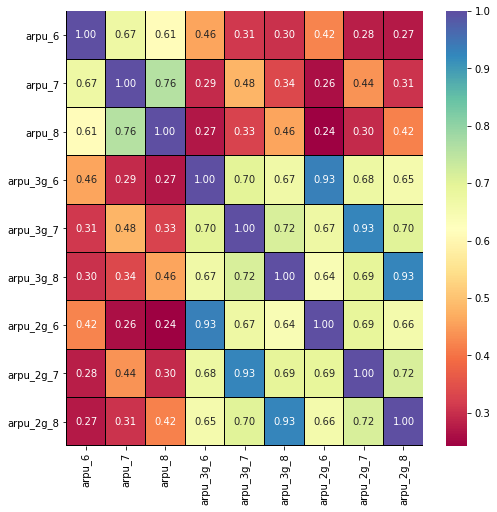

In [62]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_hvc[arpu_columns].corr(), 
            annot=True, fmt=".2f", linewidths=0.01, linecolor='black', cmap='Spectral')
plt.show()

By looking at the heatmap we can see high correlation between: <br>
  
    1. arpu_2g_6 v/s arpu_3g_6 (0.93) <br> 
    2. arpu_2g_7 v/s arpu_3g_7 (0.93) <br> 
    3. arpu_2g_8 v/s arpu_3g_8 (0.93) <br> 
    
This explains that 2g and 3g average revenue is almost same.

In [63]:
df_hvc[['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6','arpu_3g_7', 'arpu_3g_8']].isnull().sum()*100/len(df_hvc)

arpu_2g_6    44.148528
arpu_2g_7    43.145228
arpu_2g_8    46.825106
arpu_3g_6    44.148528
arpu_3g_7    43.145228
arpu_3g_8    46.825106
dtype: float64

In [64]:
# So we will drop any two of them as they are highly coorelated with each other
df_hvc = df_hvc.drop(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8'], axis = 1)

In [65]:
df_hvc.shape

(30001, 148)

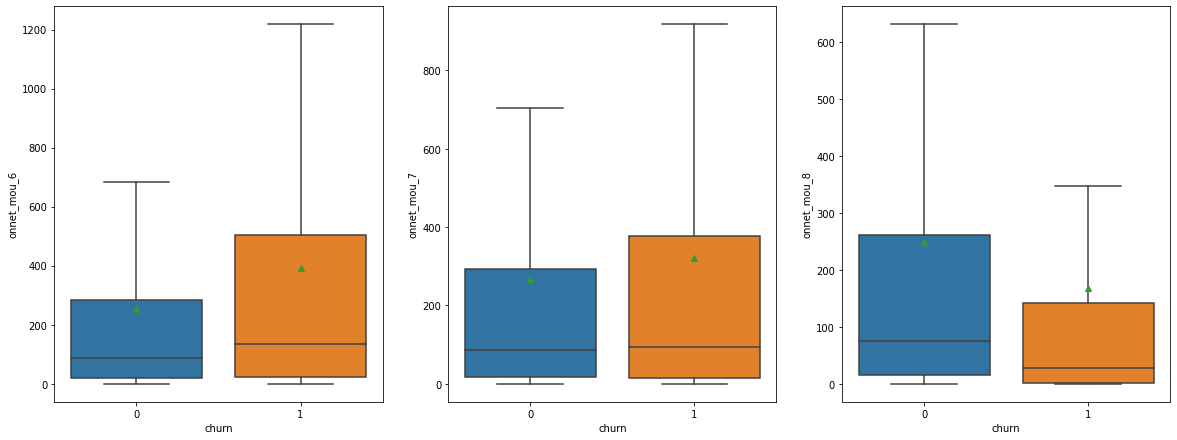

In [66]:
# ONNET (All kind of calls within the same operator network)
plot_boxplots("onnet_mou")

In terms of onnet there is a decrease in the values but its decrease is not significant as compared to other variables.

In [67]:
onnet_columns = list(df_hvc.columns[df_hvc.columns.str.contains('onnet')])

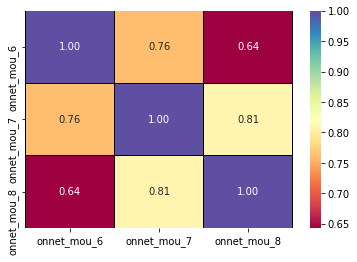

In [68]:
sns.heatmap(df_hvc[onnet_columns].corr(), 
            annot=True, fmt=".2f", linewidths=0.01, linecolor='black', cmap='Spectral')
plt.show()

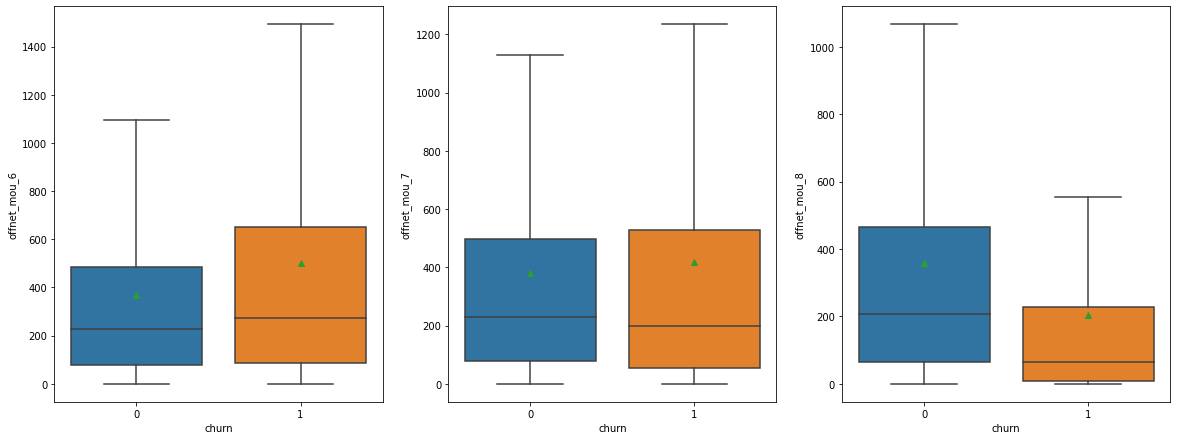

In [69]:
# OFFNET (All kind of calls outside the operator T network)
plot_boxplots('offnet_mou')


In terms of offnet there is a decrease in the values but its decrease is not significant as compared to other variables.

In [70]:
offnet_columns = list(df_hvc.columns[df_hvc.columns.str.contains('offnet')])

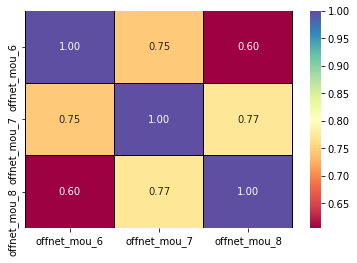

In [71]:

sns.heatmap(df_hvc[offnet_columns].corr(), 
            annot=True, fmt=".2f", linewidths=0.01, linecolor='black', cmap='Spectral')
plt.show()

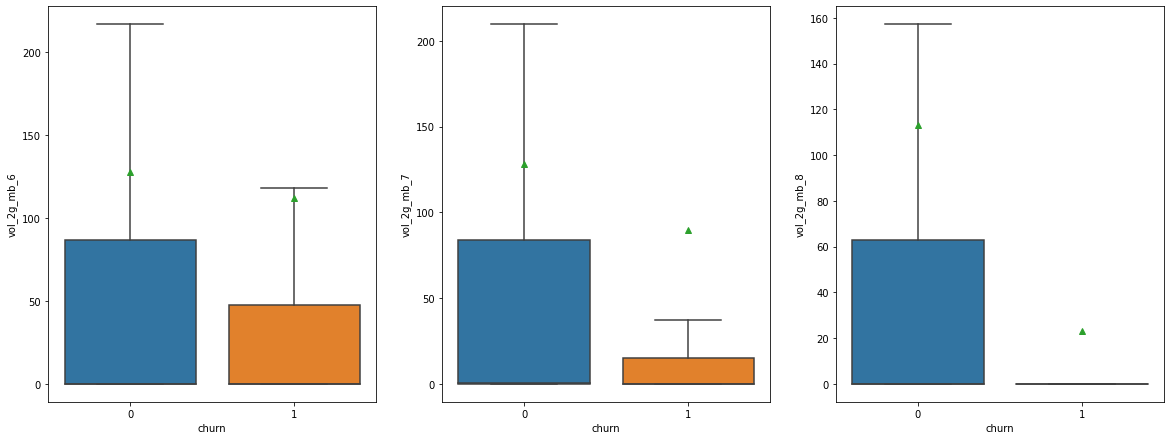

In [72]:
# Volumne of 2g data used in mb
plot_boxplots('vol_2g_mb')

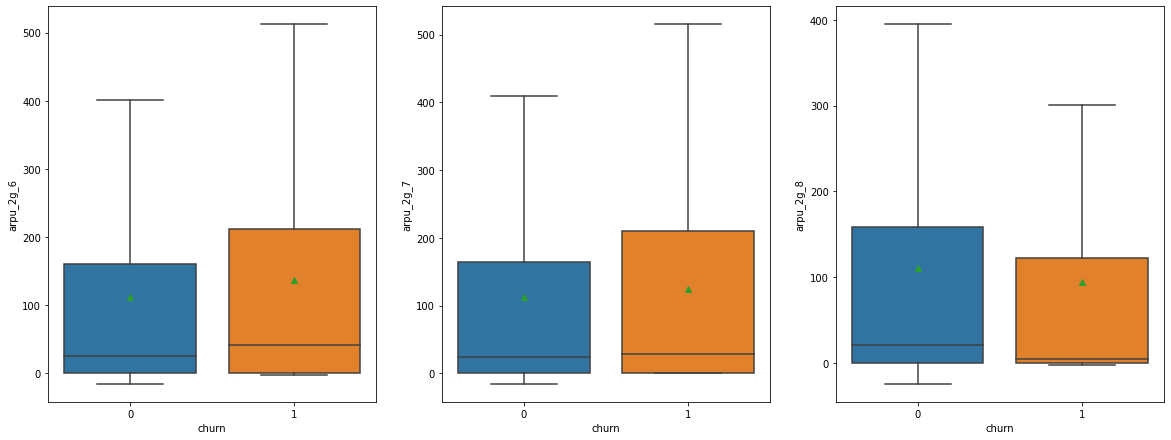

In [73]:
# Average revenue used 2g
plot_boxplots('arpu_2g')

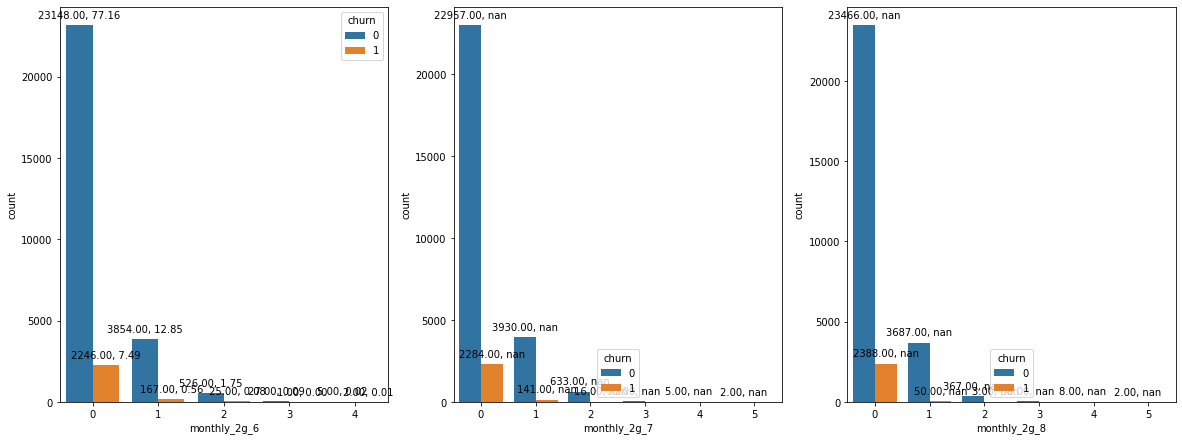

In [74]:
# Service schemes with validity equivalent to a month
plot_countplots('monthly_2g')

Volumne of 2g data consumption decreases in 8th month but the average revenue and schemes were similar.

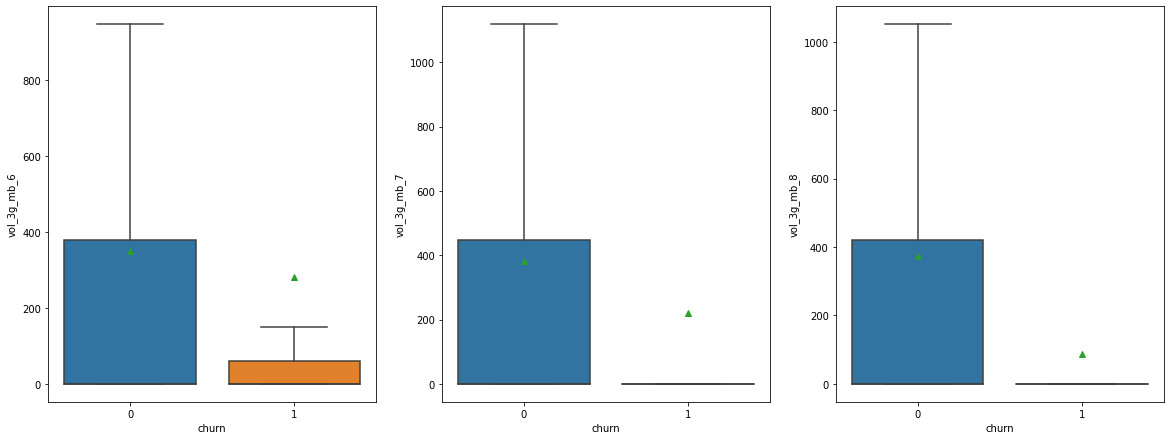

In [75]:
# Volumne of 2g data used in mb
plot_boxplots('vol_3g_mb')

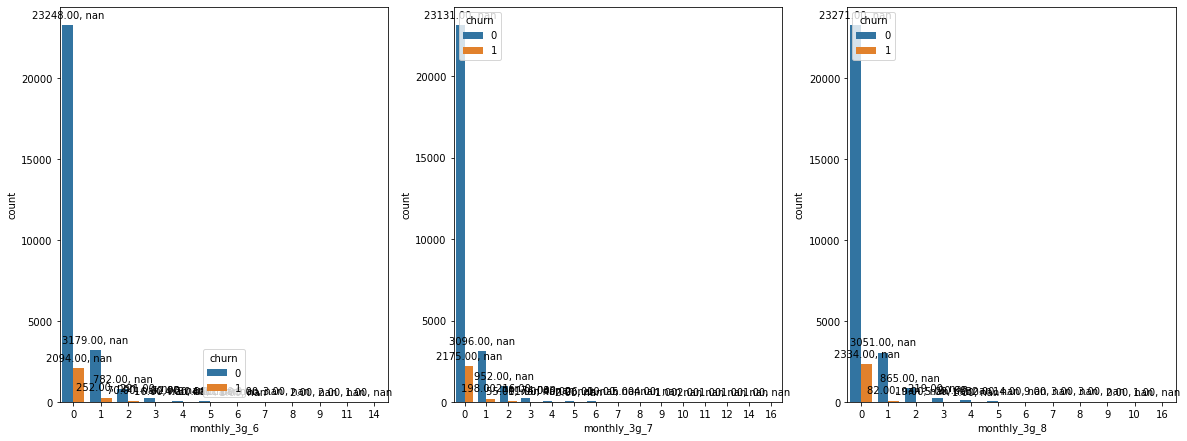

In [76]:
# Service schemes with validity equivalent to a month
plot_countplots('monthly_3g')

Similar to volumne of 3g data consumption decreases in 8th month but the average revenue and schemes were similar.

### Columns with dtypes as object

In [77]:
object_columns = list(df_hvc.columns[df_hvc.dtypes == 'object'])

In [78]:
# Convert the date fields to datetime object

for col in object_columns:
    df_hvc[col] = pd.to_datetime(df_hvc[col])

### Missing value treatment

In [79]:
# Find the percentage of missing values in dataframe
missing_df_hvc = pd.DataFrame({
    "Columns": df_hvc.columns[df_hvc.isnull().sum()>0],
    "Values": df_hvc[df_hvc.columns[df_hvc.isnull().sum()>0]].isnull().sum()/len(df_hvc)*100
})
missing_df_hvc = missing_df_hvc.reset_index(drop=True)

In [80]:
missing_df_hvc.sort_values(by='Values')

,Columns,Values
73,date_of_last_rech_6,0.243325
74,date_of_last_rech_7,0.326656
37,std_og_mou_7,1.789940
50,loc_ic_t2m_mou_7,1.789940
25,loc_og_mou_7,1.789940
53,loc_ic_t2f_mou_7,1.789940
22,loc_og_t2c_mou_7,1.789940
31,std_og_t2m_mou_7,1.789940
56,std_ic_t2t_mou_7,1.789940
19,loc_og_t2f_mou_7,1.789940


In [81]:
df_hvc[['arpu_6', 'arpu_2g_6', 'total_recharge_amt_call_data_6', 'total_rech_data_amt_6', 'total_rech_amt_6']].head(15)

,arpu_6,arpu_2g_6,total_recharge_amt_call_data_6,total_rech_data_amt_6,total_rech_amt_6
0,197.385,212.17,614.0,252.0,362
1,1069.180,NaN,1580.0,0.0,1580
2,378.721,NaN,437.0,0.0,437
3,514.453,NaN,600.0,0.0,600
4,74.350,NaN,0.0,0.0,0
5,977.020,931.58,6343.0,5285.0,1058
6,363.987,NaN,420.0,0.0,420
7,482.832,NaN,496.0,0.0,496
8,1873.271,NaN,2317.0,0.0,2317
9,978.077,12.00,1503.0,344.0,1159


#### By looking at this data, we will impute arpu_2g null values with zero because that means that user is not using data.

In [82]:
df_hvc['arpu_2g_6'] = df_hvc['arpu_2g_6'].fillna(0.0)
df_hvc['arpu_2g_7'] = df_hvc['arpu_2g_7'].fillna(0.0)
df_hvc['arpu_2g_8'] = df_hvc['arpu_2g_8'].fillna(0.0)

In [83]:
# Fill null values of fb_user data with 2 as it means that the user data is unknown (using separate value method)

df_hvc['fb_user_6'] = df_hvc['fb_user_6'].fillna(2.0)
df_hvc['fb_user_7'] = df_hvc['fb_user_7'].fillna(2.0)
df_hvc['fb_user_8'] = df_hvc['fb_user_8'].fillna(2.0)

# Fill null values of night_pk_user data with 0 as it means that the user data is unknown because that user probably does not use at night(assumption)

df_hvc['night_pck_user_6'] = df_hvc['night_pck_user_6'].fillna(2.0)
df_hvc['night_pck_user_7'] = df_hvc['night_pck_user_7'].fillna(2.0)
df_hvc['night_pck_user_8'] = df_hvc['night_pck_user_8'].fillna(2.0)

#### Now remaining data has less than 4% missing values for we will use median or mode approach on those columns (numerical and categorical respectively)

In [84]:
columns_to_impute = list(set(missing_df_hvc["Columns"]) - set(object_columns))

for col in columns_to_impute:
    if col in var_categorical:
        df_hvc[col] = df_hvc[col].fillna(df_hvc[col].mode().values[0])
    else:
        df_hvc[col] = df_hvc[col].fillna(df_hvc[col].median())

We should not care much about data leakage in this case as missing values are very less.

#### Now we need to impute the date values

In [85]:
object_columns

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [86]:
df_hvc[object_columns].head(20)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
1,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
2,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
3,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
4,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06
5,2014-06-30,2014-07-30,2014-08-26,2014-06-30,2014-07-28,2014-08-26
6,2014-06-30,2014-07-28,2014-08-24,NaT,NaT,NaT
7,2014-06-24,2014-07-22,2014-08-31,NaT,NaT,NaT
8,2014-06-29,2014-07-23,2014-08-28,NaT,NaT,NaT
9,2014-06-29,2014-07-31,2014-08-26,2014-06-29,2014-07-26,2014-08-02


### Feature Engineering

To impute the null values of date columns we will derive a recharge age/interval columns here. It will help us handle users who did not take any data plans.
<br>
Imputation method for age/interval columns:<br/>
  
    1. If both dates i.e. '_6' column date and '_7' column date is null then impute it will 0
    2. If '_6' month date is null then impute with -1.
    3. If '_7' month date is null then impute with -2.
    4. Otherwise, take the difference of days.

In [87]:
def date_imputer(date1, date2):
    if pd.isnull(date1) and pd.isnull(date2):
        return 0
    elif pd.isnull(date1):
        return -1
    elif pd.isnull(date2):
        return -2
    else:
        return int((date1 - date2).days)

In [88]:
date_imputer(df_hvc['date_of_last_rech_data_7'][2], df_hvc['date_of_last_rech_data_6'][2])

-2

In [89]:
df_hvc["interval_of_last_rech_67"] = list(map(date_imputer, df_hvc['date_of_last_rech_7'], df_hvc['date_of_last_rech_6']))
df_hvc["interval_of_last_rech_78"] = list(map(date_imputer, df_hvc['date_of_last_rech_8'], df_hvc['date_of_last_rech_7']))
df_hvc["interval_of_last_rech_data_67"] = list(map(date_imputer, df_hvc['date_of_last_rech_data_7'], df_hvc['date_of_last_rech_data_6']))
df_hvc["interval_of_last_rech_data_78"] = list(map(date_imputer, df_hvc['date_of_last_rech_data_8'], df_hvc['date_of_last_rech_data_7']))

In [90]:
# Now drop the date columns
df_hvc = df_hvc.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                      'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis = 1)

In [91]:
df_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_recharge_amt_call_data_6,total_recharge_amt_call_data_7,total_recharge_amt_call_data_8,total_avg_rech_amnt_67,churn,interval_of_last_rech_67,interval_of_last_rech_78,interval_of_last_rech_data_67,interval_of_last_rech_data_78
0,197.385,214.816,213.803,88.06,86.885,0.00,229.635,227.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.58,25.78,0.00,80.24,81.685,0.00,0.11,0.21,0.00,0.0,0.0,0.00,129.35,132.73,0.00,3.36,3.30,0.00,18.185,17.75,0.00,0.00,0.00,0.00,50.795,50.035,0.00,0.00,0.31,0.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.03,26.66,0.16,86.76,88.37,4.13,2.01,2.16,1.15,0.48,0.55,0.00,5.34,5.54,0.00,11.98,12.74,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,25,23,25,23
1,1069.180,1349.850,3171.480,57.84,54.680,52.29,453.430,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.380,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.890,31.76,49.14,6.66,20.08,16.68,60.860,75.140,77.84,0.18,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,2.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,28,32,0,0
2,378.721,492.223,137.362,413.69,351.030,35.08,94.660,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.580,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.690,10.04,75.69,0.00,0.00,0.00,130.260,143.480,98.28,0.00,0.00,0.00,10.23,0.0,0.0,0.0,508.36,431.66,

In [92]:
# Find the percentage of missing values in dataframe
missing_df_hvc = pd.DataFrame({
    "Columns": df_hvc.columns[df_hvc.isnull().sum()>0],
    "Values": df_hvc[df_hvc.columns[df_hvc.isnull().sum()>0]].isnull().sum()/len(df_hvc)*100
})
missing_df_hvc = missing_df_hvc.reset_index(drop=True)
missing_df_hvc

,Columns,Values


In [93]:
cat_list = set(['monthly_2g', 'night_pck_user', 'fb_user', 'monthly_3g'])

In [94]:
# Create a new colulmn, which would be average  of 6th & 7th months except the categorical columns
# Derive list of columns belonging to 6th and 7th months
col_list = set(df_hvc.filter(regex='_6$').columns.str[:-2])

set_of_numerical_columns = col_list - cat_list
numerical_col = []
# Take average
for idx, col in enumerate(set_of_numerical_columns):
#     print(col)
    avg_col_name = col+"_av67"
    numerical_col.append(avg_col_name)
    col_6 = col+"_6"
    col_7 = col+"_7"
    numerical_col.append(col+"_8")
    df_hvc[avg_col_name] = (df_hvc[col_6]  + df_hvc[col_7])/ 2

In [95]:
# We will drop _6 and _7 colums columns
print ("dimension of the updated dataset after creating dervied features:",df_hvc.shape)
col_to_drop = df_hvc.filter(regex='_6|_7').columns
df_hvc = df_hvc.drop(list(set(col_to_drop)-set(var_categorical)), axis=1)

print("dimension of the dataset after dropping un-necessary columns:",df_hvc.shape)

dimension of the updated dataset after creating dervied features: (30001, 188)
dimension of the dataset after dropping un-necessary columns: (30001, 98)


<AxesSubplot:>

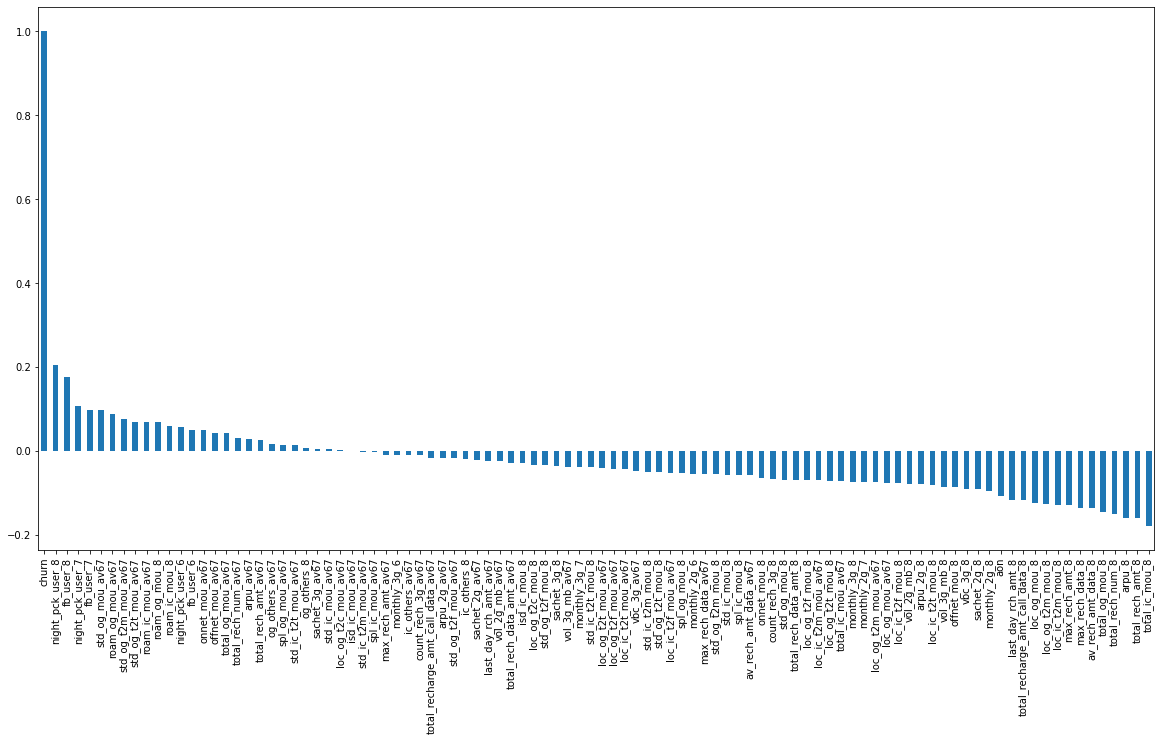

In [96]:
# Correlation of churn with other columns
plt.figure(figsize=(20,10))
df_hvc.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

# Handle Outliers

In [97]:
df_hvc.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,total_rech_data_amt_8,total_recharge_amt_call_data_8,churn,total_ic_mou_av67,spl_og_mou_av67,std_ic_mou_av67,sachet_2g_av67,loc_ic_t2m_mou_av67,ic_others_av67,std_ic_t2m_mou_av67,std_og_t2t_mou_av67,std_ic_t2t_mou_av67,max_rech_data_av67,roam_og_mou_av67,vbc_3g_av67,av_rech_amt_data_av67,total_rech_amt_av67,total_rech_num_av67,last_day_rch_amt_av67,loc_ic_t2t_mou_av67,loc_og_t2c_mou_av67,loc_og_mou_av67,vol_2g_mb_av67,total_og_mou_av67,isd_ic_mou_av67,count_rech_3g_av67,onnet_mou_av67,total_recharge_amt_call_data_av67,max_rech_amt_av67,std_og_mou_av67,loc_og_t2t_mou_av67,loc_og_t2m_mou_av67,offnet_mou_av67,loc_ic_t2f_mou_av67,vol_3g_mb_av67,loc_og_t2f_mou_av67,roam_ic_mou_av67,spl_ic_mou_av67,total_rech_data_amt_av67,std_og_t2m_mou_av67,std_og_t2f_mou_av67,arpu_2g_av67,og_others_av67,arpu_av67,sachet_3g_av67
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,508.597957,236.966438,342.809142,12.500551,19.865615,78.986541,154.673714,5.886385,1.707746,240.457671,148.497133,157.829827,1.584734,308.658150,6.583031,0.057607,551.678812,63.588341,149.589868,14.481830,13.924662,28.095169,44.814105,279.922931,0.026567,10.998257,1.224455,9.972868,584.365454,160.144462,92.393654,72.492917,0.413420,122.132258,105.913072,351.493998,58.395301,0.896537,0.875404,0.947868,0.174494,0.183261,0.153628,1.054865,0.217759,0.229026,0.211026,0.202393,1.400453,1.386954,1.413586,1209.368754,169.138860,463.252944,1047.618398,0.081364,293.353741,6.473523,48.140608,1.140045,152.597730,1.326893,30.106951,170.119687,15.167423,78.960685,23.361816,168.698363,135.218053,660.615179,11.784924,100.624813,66.520138,1.73249,256.961124,125.809755,619.116149,11.330242,0.441835,265.883606,1152.620628,170.743275,356.464403,85.542587,164.586509,380.017003,15.694605,357.227634,6.386777,14.376429,0.04040,492.005449,184.00111,1.814799,64.070401,0.351998,559.636514,0.218443
std,501.961981,457.207614,478.194983,74.125281,104.719009,227.105814,232.208945,19.502281,7.208138,361.050292,397.543749,408.922620,10.931804,608.363658,20.303921,3.3

In [98]:
def convert_values_to_log(all_values):
    transformed = []
    for value in all_values:
        if value <= 0:
            transformed.append(0)
        elif float(value) == float(1.0):
            transformed.append(1.5)
        else:
            transformed.append(np.log(value))
    return transformed

In [99]:
df_hvc[numerical_col] = df_hvc[numerical_col].apply(convert_values_to_log)

In [100]:
df_hvc.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,total_rech_data_amt_8,total_recharge_amt_call_data_8,churn,total_ic_mou_av67,spl_og_mou_av67,std_ic_mou_av67,sachet_2g_av67,loc_ic_t2m_mou_av67,ic_others_av67,std_ic_t2m_mou_av67,std_og_t2t_mou_av67,std_ic_t2t_mou_av67,max_rech_data_av67,roam_og_mou_av67,vbc_3g_av67,av_rech_amt_data_av67,total_rech_amt_av67,total_rech_num_av67,last_day_rch_amt_av67,loc_ic_t2t_mou_av67,loc_og_t2c_mou_av67,loc_og_mou_av67,vol_2g_mb_av67,total_og_mou_av67,isd_ic_mou_av67,count_rech_3g_av67,onnet_mou_av67,total_recharge_amt_call_data_av67,max_rech_amt_av67,std_og_mou_av67,loc_og_t2t_mou_av67,loc_og_t2m_mou_av67,offnet_mou_av67,loc_ic_t2f_mou_av67,vol_3g_mb_av67,loc_og_t2f_mou_av67,roam_ic_mou_av67,spl_ic_mou_av67,total_rech_data_amt_av67,std_og_t2m_mou_av67,std_og_t2f_mou_av67,arpu_2g_av67,og_others_av67,arpu_av67,sachet_3g_av67
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,5.688029,3.953792,4.860342,0.520121,0.613113,2.870397,3.887579,0.675334,0.229602,4.330619,2.082206,2.616901,0.165733,3.302898,0.790100,0.001495,5.067712,2.950137,4.132243,1.212723,0.843286,1.650126,2.190930,4.690185,-0.124582,0.471534,-0.038196,2.004018,5.682581,4.484971,3.230857,2.381930,0.296600,2.695522,1.794632,2.174982,1.349307,0.896537,0.875404,0.947868,0.174494,0.183261,0.153628,0.419956,0.217759,0.229026,0.211026,0.124564,1.400453,1.386954,1.413586,1209.368754,1.883857,3.083253,6.125600,0.081364,5.012200,0.833672,2.446227,0.322184,4.313067,-0.166889,1.872450,2.431828,1.026426,2.843823,0.901336,2.066555,3.248827,6.309588,2.265696,4.054631,3.137097,0.191116,4.620581,2.302054,5.579814,0.464927,0.144781,4.269874,6.827445,4.880063,3.699299,3.102612,4.159263,5.178108,1.254355,2.556839,0.624587,0.720926,-0.522411,3.795273,2.979789,0.149904,1.810138,-0.044145,6.145797,0.031008
std,1.541571,2.127226,1.840253,1.345250,1.530313,1.925450,1.929371,1.289924,0.912108,1.983624,2.558401,2.489743,0.732980,2.757419,1.403497,0.145591,2.286334,1.734947,1.644235,1.613633,1.668147,1.832012,1.915578,1.864542,0.475130,1.338414,0.867596,0.793865,1.8

In [101]:
df_hvc.shape

(30001, 98)

# Train and test split

In [102]:
y = df_hvc['churn']
X = df_hvc.drop('churn', axis = 1)

In [103]:
# Split in train & Test with stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, train_size=0.7, stratify=y, random_state=100)

In [104]:
X_train.shape, X_test.shape

((21000, 97), (9001, 97))

# Scaling the features

### Categorical Columns

For columns which has many categories but has few values in them, we will use one hot encoding for multiclass variables concept.

Based on the winning solution of KDD 2009 Cup i.e. we are going to limit the number of categories in the those variables to 10 most frequent labels.

In [105]:
# For categorical columns we will use one hot multiclass encoding
def top_labels_train(X_train, col1, max_val):
    col1 = [col1+'_6', col1+'_7', col1+'_8']
#     print(col1)
    top_all = []
    for col in col1:
        top = list(X_train[col].value_counts().sort_values(ascending=False).head(max_val).index)
        print("Column: " + col + "\nTop Labels: ", top)
        for categories in top:
            X_train[col+ "_" +str(categories)]=np.where(X_train[col]==categories,1,0)
#             print(col + "_" + str(categories))
        top_all.append(top)
    return top_all

def top_labels_test(X_test, col, max_val, top):
#     print("Top Labels: ", top)
    for categories in top:
        X_test[col+ "_" +str(categories)]=np.where(X_test[col]==categories,1,0)
#         print(col + "_" + str(categories))

In [106]:
df_hvc['monthly_2g_6'].value_counts()

0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

In [107]:
df_hvc['monthly_2g_7'].value_counts()

0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64

In [108]:
df_hvc['monthly_2g_8'].value_counts()

0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64

For monthly 2g data we will take top 3 features which means only 0,1,2 will have one hot encoding and other values will be zero.

In [109]:
top_monthly_2g = top_labels_train(X_train, 'monthly_2g', 3)
top_labels_monthly_2g_6, top_labels_monthly_2g_7, top_labels_monthly_2g_8 = top_monthly_2g[0], top_monthly_2g[1], top_monthly_2g[2]
X_train = X_train.drop(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'], axis = 1)

Column: monthly_2g_6
Top Labels:  [0, 1, 2]
Column: monthly_2g_7
Top Labels:  [0, 1, 2]
Column: monthly_2g_8
Top Labels:  [0, 1, 2]


In [110]:
top_labels_test(X_test, 'monthly_2g_6', 3, top_labels_monthly_2g_6)
top_labels_test(X_test, 'monthly_2g_7', 3, top_labels_monthly_2g_7)
top_labels_test(X_test, 'monthly_2g_8', 3, top_labels_monthly_2g_8)
X_test = X_test.drop(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8'], axis = 1)

In [111]:
df_hvc['monthly_3g_6'].value_counts()

0     25342
1      3431
2       852
3       237
4        76
5        34
6        12
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

In [112]:
df_hvc['monthly_3g_7'].value_counts()

0     25306
1      3294
2      1007
3       227
4        74
5        42
6        26
7        10
8         5
9         4
11        2
14        1
12        1
10        1
16        1
Name: monthly_3g_7, dtype: int64

In [113]:
df_hvc['monthly_3g_8'].value_counts()

0     25605
1      3133
2       884
3       224
4        91
5        32
6        14
7         9
9         3
8         3
10        2
16        1
Name: monthly_3g_8, dtype: int64

For monthly 3g data we will take top 5 features which means only 0,1,2,3,4 will have one hot encoding and other values will be zero.

In [114]:
top_monthly_3g = top_labels_train(X_train, 'monthly_3g', 3)
top_labels_monthly_3g_6, top_labels_monthly_3g_7, top_labels_monthly_3g_8 = top_monthly_3g[0], top_monthly_3g[1], top_monthly_3g[2]
X_train = X_train.drop(['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], axis = 1)

Column: monthly_3g_6
Top Labels:  [0, 1, 2]
Column: monthly_3g_7
Top Labels:  [0, 1, 2]
Column: monthly_3g_8
Top Labels:  [0, 1, 2]


In [115]:
top_labels_test(X_test, 'monthly_3g_6', 3, top_labels_monthly_3g_6)
top_labels_test(X_test, 'monthly_3g_7', 3, top_labels_monthly_3g_7)
top_labels_test(X_test, 'monthly_3g_8', 3, top_labels_monthly_3g_8)
X_test = X_test.drop(['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'], axis = 1)

In [116]:
df_hvc['night_pck_user_6'].value_counts()

0.0    16349
2.0    13245
1.0      407
Name: night_pck_user_6, dtype: int64

In [117]:
df_hvc['night_pck_user_7'].value_counts()

0.0    16682
2.0    12944
1.0      375
Name: night_pck_user_7, dtype: int64

In [118]:
df_hvc['night_pck_user_8'].value_counts()

0.0    15612
2.0    14048
1.0      341
Name: night_pck_user_8, dtype: int64

For nigh_pck_user we will use one hot encoding.

In [119]:
X_train = pd.get_dummies(X_train, columns=["night_pck_user_6"], drop_first=True, prefix=["night_pck_user_6"])
X_test = pd.get_dummies(X_test, columns=["night_pck_user_6"], drop_first=True, prefix=["night_pck_user_6"])
X_train = pd.get_dummies(X_train, columns=["night_pck_user_7"], drop_first=True, prefix=["night_pck_user_7"])
X_test = pd.get_dummies(X_test, columns=["night_pck_user_7"], drop_first=True, prefix=["night_pck_user_7"])
X_train = pd.get_dummies(X_train, columns=["night_pck_user_8"], drop_first=True, prefix=["night_pck_user_8"])
X_test = pd.get_dummies(X_test, columns=["night_pck_user_8"], drop_first=True, prefix=["night_pck_user_8"])

In [120]:
df_hvc['fb_user_6'].value_counts()

1.0    15525
2.0    13245
0.0     1231
Name: fb_user_6, dtype: int64

In [121]:
df_hvc['fb_user_7'].value_counts()

1.0    15722
2.0    12944
0.0     1335
Name: fb_user_7, dtype: int64

In [122]:
df_hvc['fb_user_8'].value_counts()

1.0    14313
2.0    14048
0.0     1640
Name: fb_user_8, dtype: int64

In [123]:
X_train = pd.get_dummies(X_train, columns=["fb_user_6"], drop_first=True, prefix=["fb_user_6"])
X_test = pd.get_dummies(X_test, columns=["fb_user_6"], drop_first=True, prefix=["fb_user_6"])
X_train = pd.get_dummies(X_train, columns=["fb_user_7"], drop_first=True, prefix=["fb_user_7"])
X_test = pd.get_dummies(X_test, columns=["fb_user_7"], drop_first=True, prefix=["fb_user_7"])
X_train = pd.get_dummies(X_train, columns=["fb_user_8"], drop_first=True, prefix=["fb_user_8"])
X_test = pd.get_dummies(X_test, columns=["fb_user_8"], drop_first=True, prefix=["fb_user_8"])

In [124]:
X_train.shape, X_test.shape

((21000, 115), (9001, 115))

### Numerical Columns

In [125]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = StandardScaler()
X_train[:] = scaler.fit_transform(X_train)
X_test[:] = scaler.transform(X_test)

In [233]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)

# Model Building

For evaluation of the models we will use ROC AUC score. Due to imbalanced dataset and 1 being more important for us.

In [126]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve train (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve test (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [127]:
# Train model using hyperparmeter tuning
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    # using stratified k fold to handle imbalance data
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

In [128]:
# Predict values and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

In [129]:
# Draw scree plot of pca
def get_scree_plot(pca):
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('Cummulative explained variance ratio')
    plt.show()
    return pca

## 1. Models without PCA

### i. Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [238]:
# Create the param grid for logistic regression

#Creating a dictionary grid for grid search
param_grid = {}
lr_param_grid = {
    'max_iter': [50,100]
}
# Hyperparameter tuning on class weights in logistic regression

In [239]:
lr_model = LogisticRegression(random_state=100)

In [240]:
# Train model using grid search cv and stratified k fold method
lr_grid = training_model_hyperparameter(lr_model, 'roc_auc', lr_param_grid, X_train, y_train)

In [241]:
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({'score': lr_grid.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('AUC ROC')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

ValueError: array length 2 does not match index length 115

<Figure size 864x576 with 0 Axes>

In [135]:
lr_grid.best_params_

{'class_weight': {0: 0.12529411764705883, 1: 0.8747058823529412}}

In [136]:
y_train_pred_lr, y_train_pred_lr_prob, y_test_pred_lr, y_test_pred_lr_prob = \
                                    prediction_model(lr_grid, X_train, y_train, X_test, y_test)

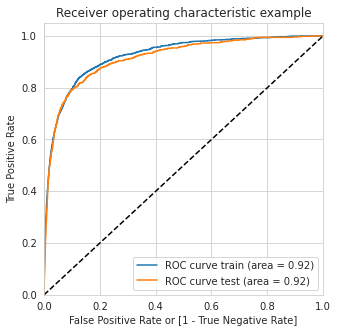

In [137]:
draw_roc(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob)

In [138]:
print(metrics.classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     19291
           1       0.45      0.77      0.57      1709

    accuracy                           0.90     21000
   macro avg       0.71      0.84      0.76     21000
weighted avg       0.94      0.90      0.92     21000



In [139]:
print(metrics.classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8269
           1       0.44      0.77      0.56       732

    accuracy                           0.90      9001
   macro avg       0.71      0.84      0.75      9001
weighted avg       0.93      0.90      0.91      9001



### ii. Logistic Regression with feature selection

In [140]:
from sklearn.feature_selection import RFE

We will take the class weights which we got in our logistic regression model using hyperparameter tuning

In [141]:
logreg_rfe = LogisticRegression(random_state = 100, class_weight={0:0.13, 1:0.87})

In [142]:
rfe50 = RFE(logreg_rfe, n_features_to_select = 50)
rfe50 = rfe50.fit(X_train, y_train)

In [143]:
col = X_train.columns[rfe50.support_]

In [144]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe50 = X_train[col]
X_test_rfe50 = X_test[col]

In [145]:
logreg_rfe50 = LogisticRegression(random_state = 100, class_weight={0:0.13, 1:0.87})
logreg_rfe50 = logreg_rfe50.fit(X_train_rfe50, y_train)

In [146]:
y_train_pred_rfe50, y_train_pred_rfe50_prob, y_test_pred_rfe50, y_test_pred_rfe50_prob = prediction_model(logreg_rfe50, X_train_rfe50, y_train, X_test_rfe50, y_test)

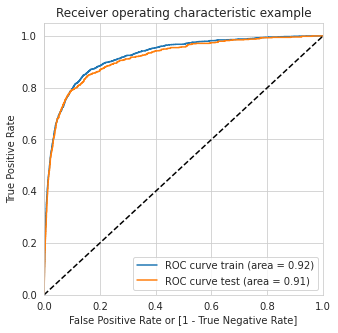

In [147]:
draw_roc(y_train, y_train_pred_rfe50_prob, y_test, y_test_pred_rfe50_prob)

<AxesSubplot:>

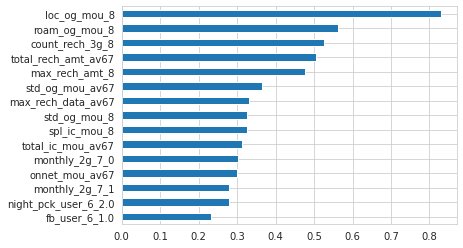

In [148]:
importances = logreg_rfe50.coef_[0]
weights = pd.Series(importances,
                 index=X_train_rfe50.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

In [149]:
print(metrics.classification_report(y_train, y_train_pred_rfe50))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     19291
           1       0.46      0.76      0.57      1709

    accuracy                           0.91     21000
   macro avg       0.72      0.84      0.76     21000
weighted avg       0.93      0.91      0.92     21000



In [150]:
print(metrics.classification_report(y_test, y_test_pred_rfe50))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8269
           1       0.45      0.77      0.57       732

    accuracy                           0.91      9001
   macro avg       0.72      0.84      0.76      9001
weighted avg       0.94      0.91      0.92      9001



### iii. Random Forest Classifier

In random forest we don't need to do feature selection as it robust to the higher number of dimension as it takes a set of max features in a model.

In [151]:
# Create the param grid for random forest
weights = np.linspace(0.01,.99,5)

# Keeping max depth low as number of features are high and max features is also in range of 10 to 20.
# To not overfit our model using these parameters
param_grid_rf = [{
               'max_depth': [3, 5, 7],
               'max_features': [10, 15, 20],
               'class_weight': [{0:x, 1:1.0-x} for x in weights]}]

In [152]:
rf_model = RandomForestClassifier(random_state=100)

In [155]:
rf_grid = training_model_hyperparameter(rf_model, 'roc_auc', param_grid_rf, X_train, y_train)

In [156]:
rf_grid.best_params_

{'class_weight': {0: 0.255, 1: 0.745}, 'max_depth': 7, 'max_features': 20}

In [157]:
y_train_pred_rf, y_train_pred_rf_prob, y_test_pred_rf, y_test_pred_rf_prob = \
                                    prediction_model(rf_grid, X_train, y_train, X_test, y_test)

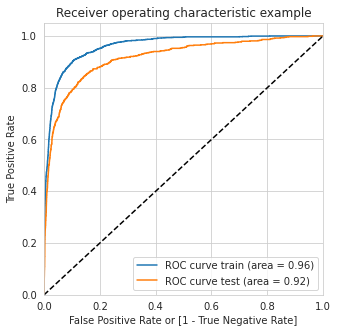

In [158]:
draw_roc(y_train, y_train_pred_rf_prob, y_test, y_test_pred_rf_prob)

In [159]:
print(metrics.classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     19291
           1       0.73      0.64      0.68      1709

    accuracy                           0.95     21000
   macro avg       0.85      0.81      0.83     21000
weighted avg       0.95      0.95      0.95     21000



In [160]:
print(metrics.classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8269
           1       0.65      0.58      0.62       732

    accuracy                           0.94      9001
   macro avg       0.81      0.78      0.79      9001
weighted avg       0.94      0.94      0.94      9001



### iv. AdaBoost Classifier

In [170]:
# Because of high number of features we will choose n_estimators for hyperparameter tuning
param_grid_ada = [{
               'n_estimators': [50, 100, 200],
               }]

In [171]:
# Build AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [172]:
# Train model using grid search cv and stratified k fold method
ada_grid = training_model_hyperparameter(ada_model, 'roc_auc', param_grid_ada, X_train, y_train)

In [173]:
ada_grid.best_params_

{'n_estimators': 50}

In [174]:
y_train_pred_ada, y_train_pred_ada_prob, y_test_pred_ada, y_test_pred_ada_prob = \
                                    prediction_model(ada_grid, X_train, y_train, X_test, y_test)

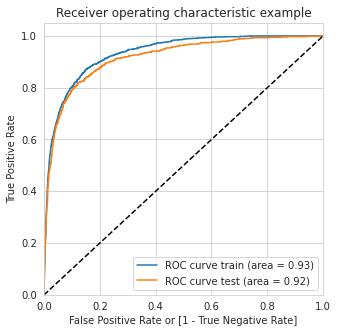

In [175]:
draw_roc(y_train, y_train_pred_ada_prob, y_test, y_test_pred_ada_prob)

In [176]:
print(metrics.classification_report(y_train, y_train_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     19291
           1       0.71      0.50      0.59      1709

    accuracy                           0.94     21000
   macro avg       0.83      0.74      0.78     21000
weighted avg       0.94      0.94      0.94     21000



In [177]:
print(metrics.classification_report(y_test, y_test_pred_ada))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8269
           1       0.68      0.49      0.57       732

    accuracy                           0.94      9001
   macro avg       0.82      0.73      0.77      9001
weighted avg       0.93      0.94      0.94      9001



### v. Support Vector Machine

In [178]:
# Create the param grid for random forest
weights = np.linspace(0.01,.99,5)

# Class weight as hyperparameter tuning parameter
param_grid_svc = [{
               'class_weight': [{0:x, 1:1.0-x} for x in weights]}]

In [179]:
svc_model = SVC(probability=True, random_state=100)

In [180]:
# Train model using grid search cv and stratified k fold method
svc_grid = training_model_hyperparameter(svc_model, 'roc_auc', param_grid_svc, X_train, y_train)

In [181]:
svc_grid.best_params_

{'class_weight': {0: 0.255, 1: 0.745}}

In [182]:
y_train_pred_svc, y_train_pred_svc_prob, y_test_pred_svc, y_test_pred_svc_prob = \
                                    prediction_model(svc_grid, X_train, y_train, X_test, y_test)

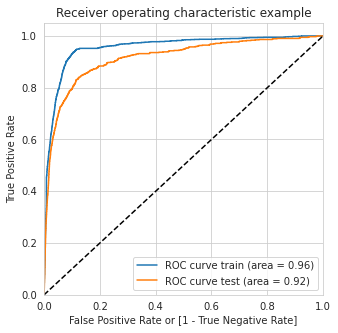

In [183]:
draw_roc(y_train, y_train_pred_svc_prob, y_test, y_test_pred_svc_prob)

In [184]:
print(metrics.classification_report(y_train, y_train_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19291
           1       0.67      0.64      0.66      1709

    accuracy                           0.95     21000
   macro avg       0.82      0.81      0.81     21000
weighted avg       0.94      0.95      0.94     21000



In [185]:
print(metrics.classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8269
           1       0.62      0.61      0.62       732

    accuracy                           0.94      9001
   macro avg       0.79      0.79      0.79      9001
weighted avg       0.94      0.94      0.94      9001



## 2. Models with PCA

In [186]:
from sklearn.decomposition import IncrementalPCA, PCA

In [187]:
pca = PCA(random_state=101)

# Apply PCA on train data
pca.fit(X_train)

PCA(random_state=101)

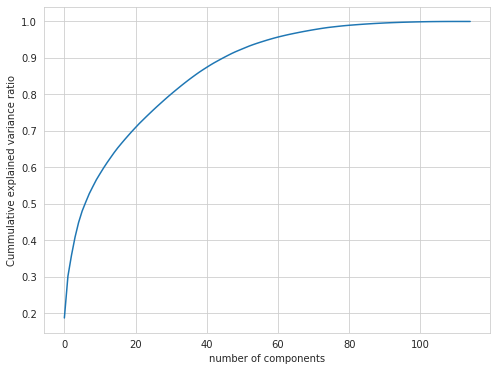

PCA(random_state=101)

In [188]:
get_scree_plot(pca)

In [189]:
pca = IncrementalPCA(n_components = 43)

# Apply PCA on train data
pca.fit(X_train)

IncrementalPCA(n_components=43)

In [190]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### i. Logistic Regression

In [191]:
# Create the param grid for logistic regression

# Setting the range for class weights
weights = np.linspace(0.01,.99,10)

#Creating a dictionary grid for grid search
param_grid = {}
lr_param_grid = {
    'class_weight': [{0:x, 1:1.0-x} for x in weights]
}

In [192]:
# Build Logistic regression model
lr_model = LogisticRegression(random_state=100)

In [193]:
# Train model using grid search cv and stratified k fold method
lr_grid = training_model_hyperparameter(lr_model, 'roc_auc', lr_param_grid, X_train_pca, y_train)

Text(0.5, 1.0, 'Scoring for different class weights')

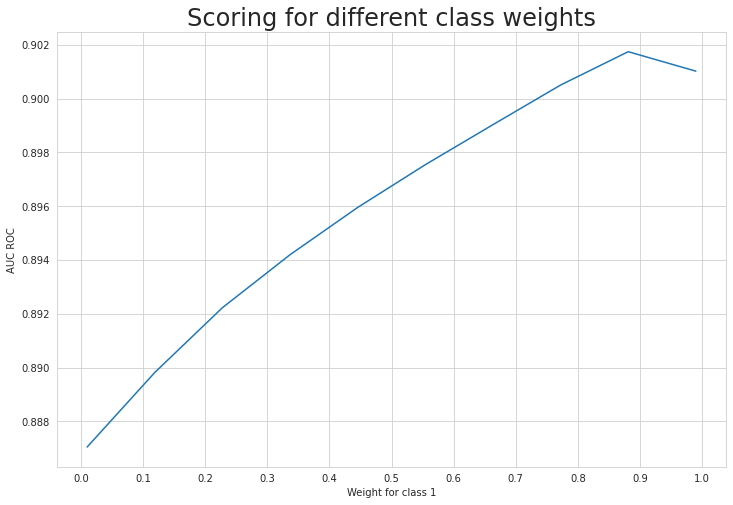

In [194]:
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({'score': lr_grid.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('AUC ROC')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [195]:
# Print best parameters
lr_grid.best_params_

{'class_weight': {0: 0.11888888888888888, 1: 0.8811111111111112}}

In [196]:
# Predict the training and testing results 
y_train_pred_lr, y_train_pred_lr_prob, y_test_pred_lr, y_test_pred_lr_prob = \
                                    prediction_model(lr_grid, X_train_pca, y_train, X_test_pca, y_test)

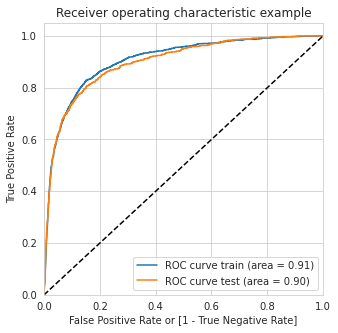

In [197]:
# Draw ROC
draw_roc(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob)

In [198]:
print(metrics.classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     19291
           1       0.42      0.72      0.53      1709

    accuracy                           0.90     21000
   macro avg       0.70      0.82      0.74     21000
weighted avg       0.93      0.90      0.91     21000



In [199]:
print(metrics.classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8269
           1       0.41      0.73      0.52       732

    accuracy                           0.89      9001
   macro avg       0.69      0.82      0.73      9001
weighted avg       0.93      0.89      0.90      9001



### ii. Random Forest Classifier

In [200]:
# Create the param grid for random forest
weights = np.linspace(0.01,.99,5)

# Keeping max depth low as number of features are high and max features is also in range of 10 to 20.
# To not overfit our model using these parameters
param_grid_rf = [{
               'max_depth': [3, 5, 7],
               'max_features': [7, 10, 15],
               'class_weight': [{0:x, 1:1.0-x} for x in weights]}]

In [201]:
rf_model = RandomForestClassifier(random_state=100)

In [202]:
# Train model using grid search cv and stratified k fold method
rf_grid = training_model_hyperparameter(rf_model, 'roc_auc', param_grid_rf, X_train_pca, y_train)

In [203]:
rf_grid.best_params_

{'class_weight': {0: 0.255, 1: 0.745}, 'max_depth': 7, 'max_features': 10}

In [204]:
y_train_pred_rf, y_train_pred_rf_prob, y_test_pred_rf, y_test_pred_rf_prob = \
                                    prediction_model(rf_grid, X_train_pca, y_train, X_test_pca, y_test)

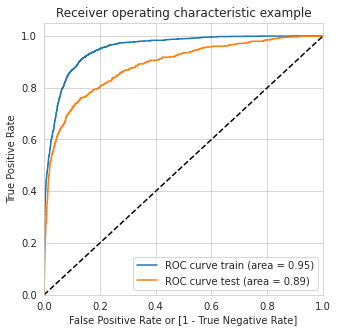

In [205]:
draw_roc(y_train, y_train_pred_rf_prob, y_test, y_test_pred_rf_prob)

In [206]:
print(metrics.classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     19291
           1       0.70      0.56      0.62      1709

    accuracy                           0.95     21000
   macro avg       0.83      0.77      0.80     21000
weighted avg       0.94      0.95      0.94     21000



In [207]:
print(metrics.classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8269
           1       0.65      0.52      0.58       732

    accuracy                           0.94      9001
   macro avg       0.80      0.75      0.77      9001
weighted avg       0.93      0.94      0.93      9001



### iii. Support Vector Machine

In [208]:
# Create the param grid for random forest
weights = np.linspace(0.01,.99,5)

param_grid_svc = [{
               'class_weight': [{0:x, 1:1.0-x} for x in weights]}]

In [209]:
svc_model = SVC(probability=True, random_state=100)

In [210]:
# Train model using grid search cv and stratified k fold method
svc_grid = training_model_hyperparameter(svc_model, 'roc_auc', param_grid_svc, X_train_pca, y_train)

In [211]:
svc_grid.best_params_

{'class_weight': {0: 0.255, 1: 0.745}}

In [212]:
y_train_pred_svc, y_train_pred_svc_prob, y_test_pred_svc, y_test_pred_svc_prob = \
                                    prediction_model(svc_grid, X_train_pca, y_train, X_test_pca, y_test)

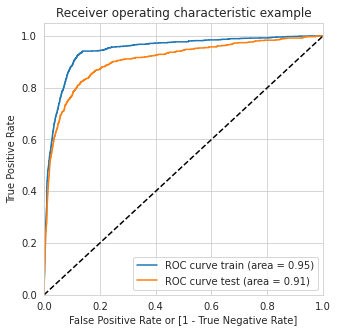

In [213]:
draw_roc(y_train, y_train_pred_svc_prob, y_test, y_test_pred_svc_prob)

In [214]:
print(metrics.classification_report(y_train, y_train_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     19291
           1       0.64      0.62      0.63      1709

    accuracy                           0.94     21000
   macro avg       0.80      0.79      0.80     21000
weighted avg       0.94      0.94      0.94     21000



In [215]:
print(metrics.classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8269
           1       0.60      0.60      0.60       732

    accuracy                           0.93      9001
   macro avg       0.78      0.78      0.78      9001
weighted avg       0.94      0.93      0.93      9001



With PCA we got around same AUC score as before but we have only 43 features(components) now to deal with. <br>
SVM performed better with PCA in comparision to other models with PCA in terms of AUC ROC.

# Feature Importance

### **Explainable Models:** <br>

**Feature importance without RFE:**

We will use these models to find the feature importance.

In [216]:
lr_model = LogisticRegression(class_weight={0:0.13, 1:0.87})
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.13, 1: 0.87})

<AxesSubplot:>

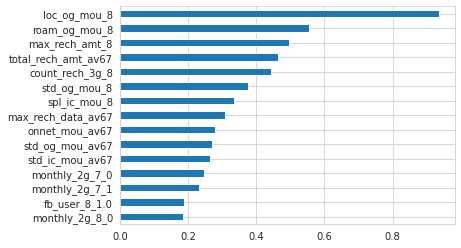

In [217]:
importances = lr_model.coef_[0]
weights = pd.Series(importances,
                 index=X_train.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

**Feature importance with RFE**

<AxesSubplot:>

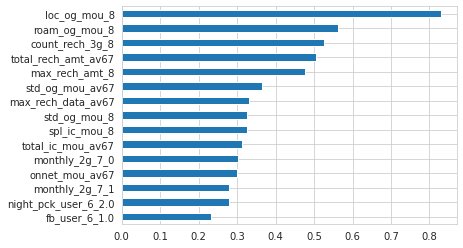

In [218]:
importances = logreg_rfe50.coef_[0]
weights = pd.Series(importances,
                 index=X_train_rfe50.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

#### Feature importance of random forest classifier

In [219]:
rf_model = RandomForestClassifier(random_state=100, class_weight = {0: 0.255, 1: 0.745}, max_depth = 7, max_features = 20)

In [220]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.255, 1: 0.745}, max_depth=7,
                       max_features=20, random_state=100)

<AxesSubplot:>

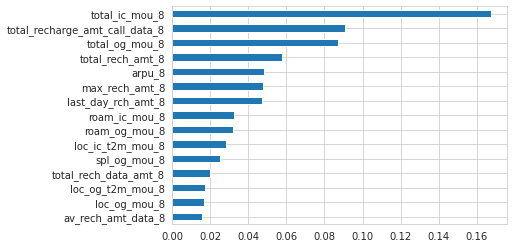

In [221]:
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X_train.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

We will look into the feature importance of random forest classifier as it has highest roc_auc score out of all the models.

- Total incoming and outgoing minutes of usage in 8th month and recharge and revenue generated in 8th month has the highest importance.
- We can also see 8th month changes are very important as many 8th month features has high importance.

# Recommendations

 - Total recharge amount for call and data are strong indicators of whether a customer can churn.
 - Total incoming and outgoing minutes of usage has the highest importance and are good indicators of churn.
 - Average revenue generated per user also is a good predictor.
 - We can also see 8th month changes are very important as many 8th month features has high importance.
 - Behaviour is 8 Month can be the base of Churn Analysis.